# Graded Challenge 4
## Introduction
- Name: Izzan Dienurrahman
- Batch: HCK-003

## Objective
- Membuat model `clustering` untuk melakukan `Customer Segmentation` dari data penggunaan kartu kredit selama 6 bulan terakhir pada suatu bank.


## Problem Statements
- Meload dataset 
- Mengidentifikasi distribusi kolom-kolom pada dataset
- Mengidentifikasi fitur/kolom yang kiranya berkaitan satu dengan lainnya
- Menghandle missing value dan outlier
- Mereduksi fitur atau kolom yang tidak terlalu diperlukan
- Mendefinisikan teknik clustering dan menetapkan jumlah target cluster
- Mengevaluasi model dengan melihat kecocokan cluster yang terbentuk dan pertimbangan metrik kuantitatif lainnya
- Menyimpan model

## Dataset Desciription
<img src='https://camo.githubusercontent.com/421c39f19d05b00c2e90bd698f5f6728bb0908a4ddbebeb6177bcfc4105c9dca/68747470733a2f2f692e6962622e636f2f32736266304a732f50312d47342d446174617365742d496e666f726d6174696f6e2e706e67'>

## SQL Command
>SELECT *
>FROM `ftds-hacktiv8-project.phase1_ftds_003_hck.credit-card-information`
>WHERE MOD(CUST_ID,2) != 0
>ORDER BY CUST_ID

## Import Library

In [153]:
# import library yang dibutuhkan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy  as np
import seaborn as sns; sns.set()
import joblib
import matplotlib.pyplot as plt

## Data Loading

In [154]:
# set max display column
pd.set_option('display.max_columns', 100)

In [155]:
df = pd.read_csv('h8dsft_P1G4_Izzan.csv') # read csv insurance

In [156]:
df.head() # menampilkan 5 data teratas

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        1  1854.033230           1.000000    1013.50            576.00   
1        3   129.836526           0.909091    1433.99            743.99   
2        5    21.580264           0.909091     284.72              0.00   
3        7    16.379412           0.454545     178.15              0.00   
4        9   686.657879           1.000000    2476.45           1624.50   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  437.50   1243.093189             0.500000   
1                  690.00      0.000000             0.909091   
2                  284.72      0.000000             0.666667   
3                  178.15      0.000000             0.250000   
4                  851.95    253.273353             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.083333                          0.333333   
1                    0.454545                          0.636364   
2                    0.000000                          0.666667   
3                    0.000000                          0.250000   
4                    0.750000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.083333                 5             15        2000.0   
1                0.000000                 0             19        4000.0   
2                0.000000                 0             16        5000.0   
3                0.000000                 0              3        5000.0   
4                0.083333                 1             35        4000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   654.473825       1524.375697          0.000000      12  
1  1363.134203        141.648860          0.875000      11  
2   344.161416        155.792859          0.800000      12  
3   229.376368         89.613822          0.181818      12  
4  1600.734366        224.265608          0.083333      12

In [157]:
df.tail(5) # menampilkan 5 data terbawah

CUST_ID       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4470     8941  10571.411070           1.000000    7739.48              0.00   
4471     8943   2584.317807           1.000000       0.00              0.00   
4472     8945    655.712971           1.000000     264.35            202.80   
4473     8947   6593.820644           1.000000     388.66            388.66   
4474     8949     37.307085           0.833333     363.38              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4470                 7739.48      0.000000             1.000000   
4471                    0.00   6036.492283             0.000000   
4472                   61.55      0.000000             0.333333   
4473                    0.00   4621.934580             0.583333   
4474                  363.38     36.363896             0.833333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4470                    0.000000                          1.000000   
4471                    0.000000                          0.000000   
4472                    0.083333                          0.166667   
4473                    0.583333                          0.000000   
4474                    0.000000                          0.666667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4470                0.000000                 0             44        8000.0   
4471                0.250000                 7              0        3000.0   
4472                0.000000                 0              6        1500.0   
4473                0.416667                 7              7        7000.0   
4474                0.166667                 1              6        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4470  2688.447014      76406.207520          0.000000      12  
4471  6024.595066        826.013735          0.181818      12  
4472   180.129661        295.417192          0.000000      12  
4473  1624.583114       2503.402340          0.000000      12  
4474   284.093261         92.369903          0.000000       6

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [159]:
# menampilkan standar missing value pada masing masing kolom
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [160]:
# show missing value in percentage
mv = df.MINIMUM_PAYMENTS.isna().sum()/df.CUST_ID.count()
print(f"Total missing value : {mv:.2%}")

Total missing value : 3.46%


Missing value relatif kecil, maka entri tersebut akan langsung di drop.

In [161]:
# drop missing value
df.dropna(inplace=True)

In [162]:
# drop kolom yang tidak diperlukan
df.drop(columns='CUST_ID',inplace=True)

In [163]:
# cek data yang memiliki duplikat
n_data_duplicate = df.duplicated().sum()
print(f"Jumlah data duplikat sebanyak {n_data_duplicate} entri")

Jumlah data duplikat sebanyak 0 entri


# Exploratory Data Analysis (EDA)

In [164]:
# menampilkan 5 data teratas
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  1854.033230           1.000000    1013.50            576.00   
1   129.836526           0.909091    1433.99            743.99   
2    21.580264           0.909091     284.72              0.00   
3    16.379412           0.454545     178.15              0.00   
4   686.657879           1.000000    2476.45           1624.50   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  437.50   1243.093189             0.500000   
1                  690.00      0.000000             0.909091   
2                  284.72      0.000000             0.666667   
3                  178.15      0.000000             0.250000   
4                  851.95    253.273353             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.083333                          0.333333   
1                    0.454545                          0.636364   
2                    0.000000                          0.666667   
3                    0.000000                          0.250000   
4                    0.750000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.083333                 5             15        2000.0   
1                0.000000                 0             19        4000.0   
2                0.000000                 0             16        5000.0   
3                0.000000                 0              3        5000.0   
4                0.083333                 1             35        4000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   654.473825       1524.375697          0.000000      12  
1  1363.134203        141.648860          0.875000      11  
2   344.161416        155.792859          0.800000      12  
3   229.376368         89.613822          0.181818      12  
4  1600.734366        224.265608          0.083333      12

In [165]:
# menampilkan informasi deskriptif kolom data numerik
df[['BALANCE','CREDIT_LIMIT','TENURE']].describe()

BALANCE  CREDIT_LIMIT       TENURE
count   4320.000000   4320.000000  4320.000000
mean    1602.334246   4519.752747    11.537269
std     2083.982473   3629.836432     1.297405
min        0.000000     50.000000     6.000000
25%      144.637202   1600.000000    12.000000
50%      917.879527   3000.000000    12.000000
75%     2096.706479   6500.000000    12.000000
max    18495.558550  30000.000000    12.000000

Rata-rata `balance` nasabah senilai $1600, rata-rata `credit_limit` $4500, untuk `tenure` atau durasi pinjaman yang harus dibayarkan didapati nilai minimal 6 bulan dan maksimal 12 bulan.

In [166]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [167]:
# construct titles for plotting
scaled_num_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',\
       'CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS','TENURE']
titles = []
for i in range(len(scaled_num_col)):
    titles.append('Distribusi ' + scaled_num_col[i])

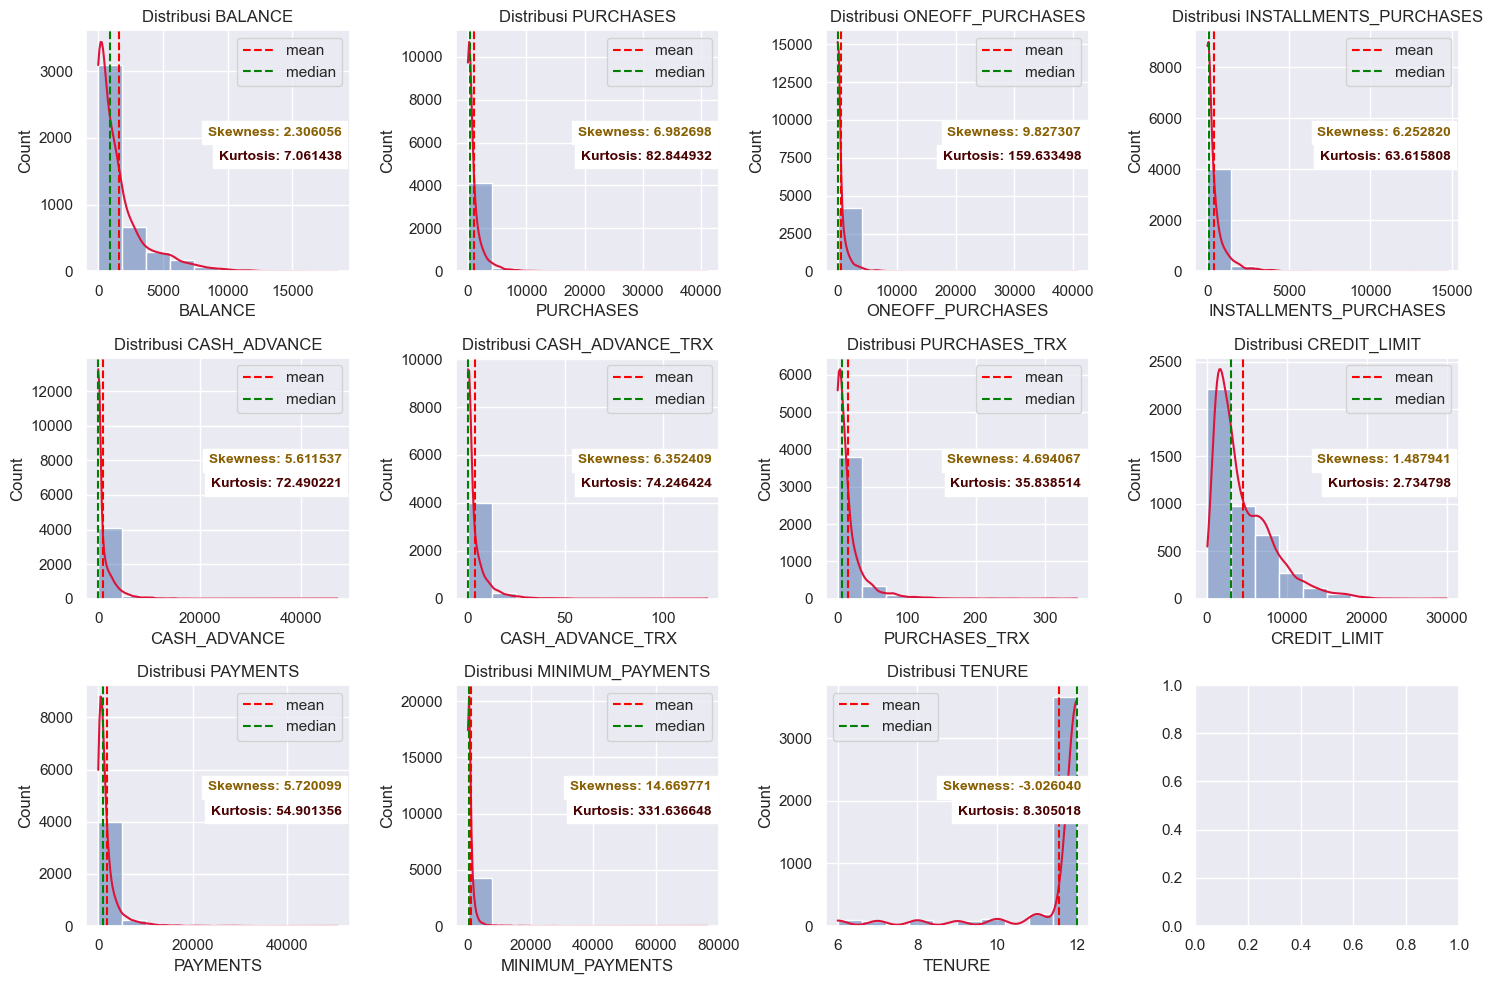

In [168]:
# plot distribusi kolom numerik
row_num=3
col_num=4
fig, axes= plt.subplots(row_num,col_num, figsize=(15,10))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.8)
x=0
try:
    for i in range(row_num):
        for j in range(col_num):
            sns.histplot(ax=axes[i][j], data=df[scaled_num_col[x]], kde=True, bins=10)
            axes[i][j].set_title(titles[x])
            axes[i][j].lines[0].set_color('crimson')
            axes[i][j].axvline(df[scaled_num_col[x]].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
            axes[i][j].axvline(df[scaled_num_col[x]].median(), color = 'green', linestyle = 'dashed', label = 'median')
            axes[i][j].legend()
            axes[i][j].text(x=0.97, y=0.60, transform=axes[i][j].transAxes, s="Skewness: %f" % df[scaled_num_col[x]].skew(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='xkcd:poo brown')
            axes[i][j].text(x=0.97, y=0.50, transform=axes[i][j].transAxes, s="Kurtosis: %f" % df[scaled_num_col[x]].kurt(),\
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='xkcd:dried blood')
            x+=1
except:
    pass
plt.tight_layout()

Tidak ada fitur yang terdistribusi normal, karena teknik clustering K-means dan PCA mengasumsikan data terdistribusi normal, maka data akan di transform ke bentuk `log transform`.

## Normal Distribution Transform

In [169]:
# preserve data frame dengan mengcopy ke data train
data_train = df.copy()

In [170]:
# melakukan log transform untuk mengubah ke distribusi normal
data_train.iloc[:,:] = np.log(1+data_train)

## Outlier Handling
Outlier handling akan dilakukan pada fitur numerikal kontinu dengan melihat distribusi dan outliernya terlebih dahulu. Untuk outlier dibawah 5% akan dilakukan trimming, untuk outlier diatas 5% akan dilakukan censoring/capping.

In [171]:
# fungsi untuk membuat histogram dan boxplot dari suatu fitur
def plot_diagnostic(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=10)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1], whis=1.5)
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normally distributed".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' is moderately right skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' is highly right skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' is moderately left skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' is highly left skewed".format(col))

In [172]:
# fungsi untuk mendapatkan upper dan lower boundary dari suatu distribusi
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

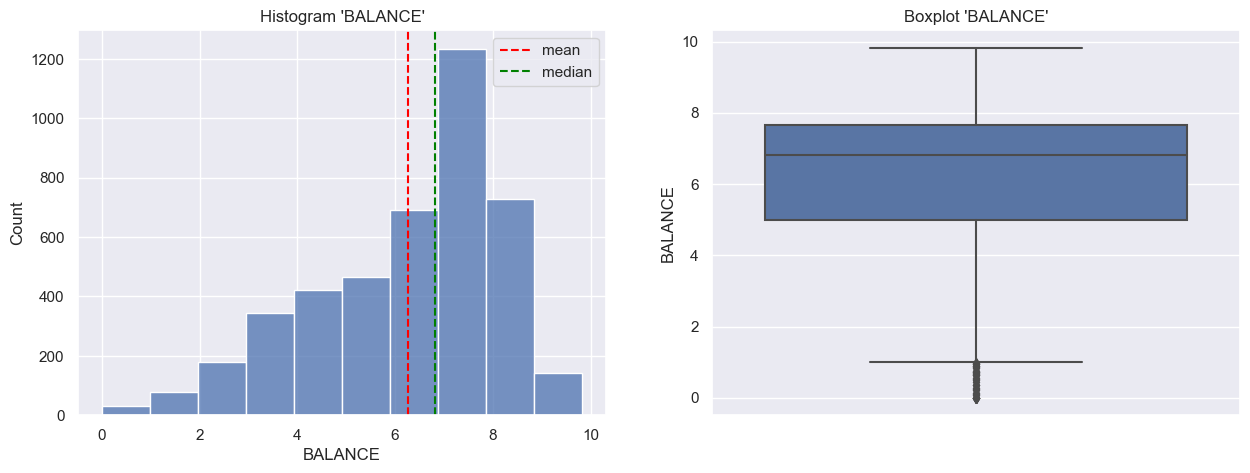

BALANCE Kurtosis: -0.08716921551963797
BALANCE Skewness: -0.7747323486182448
Columns 'BALANCE' is moderately left skewed


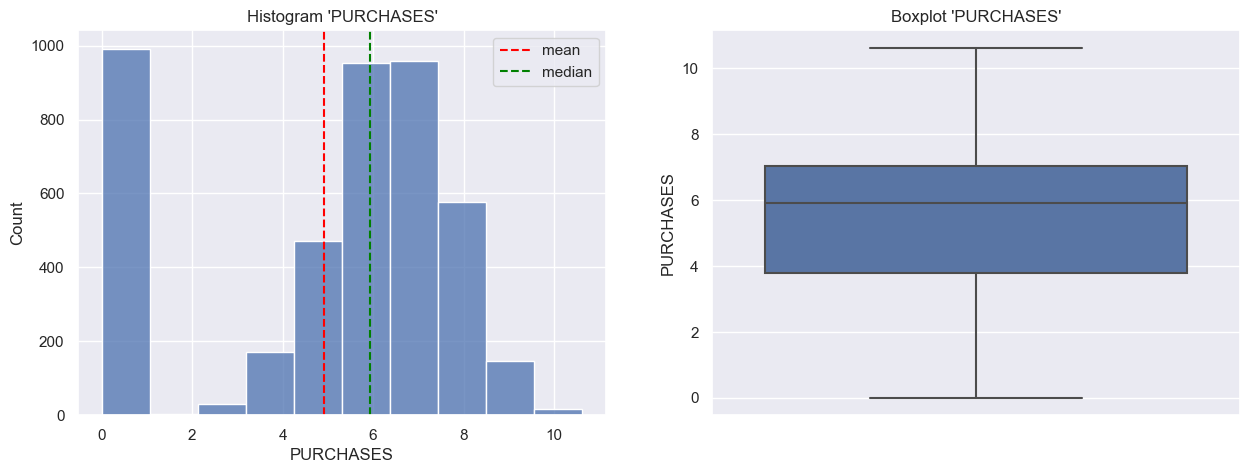

PURCHASES Kurtosis: -0.8111457380637894
PURCHASES Skewness: -0.7686677097886859
Columns 'PURCHASES' is moderately left skewed


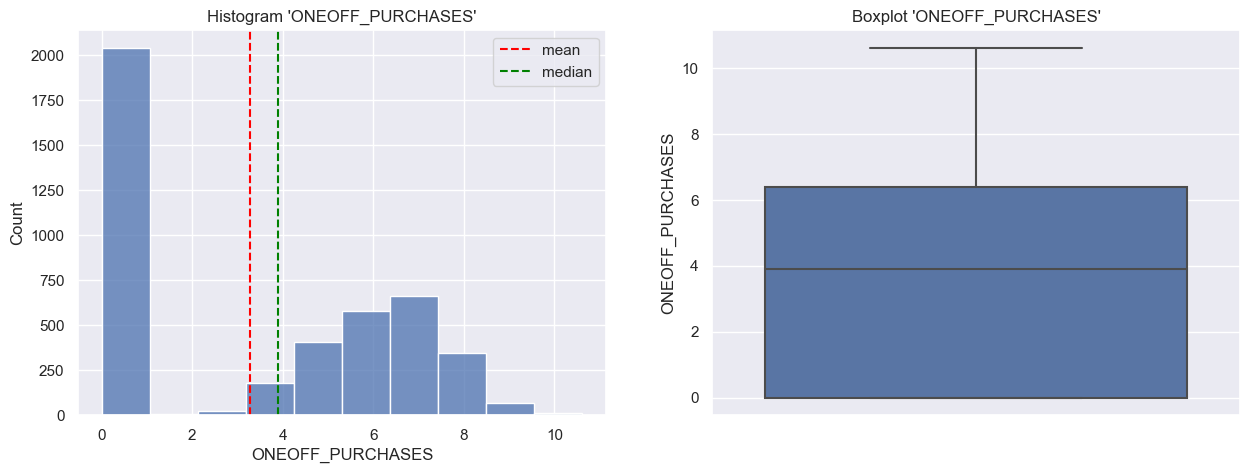

ONEOFF_PURCHASES Kurtosis: -1.6870476696457837
ONEOFF_PURCHASES Skewness: 0.1510813431305643
Columns 'ONEOFF_PURCHASES' is normally distributed


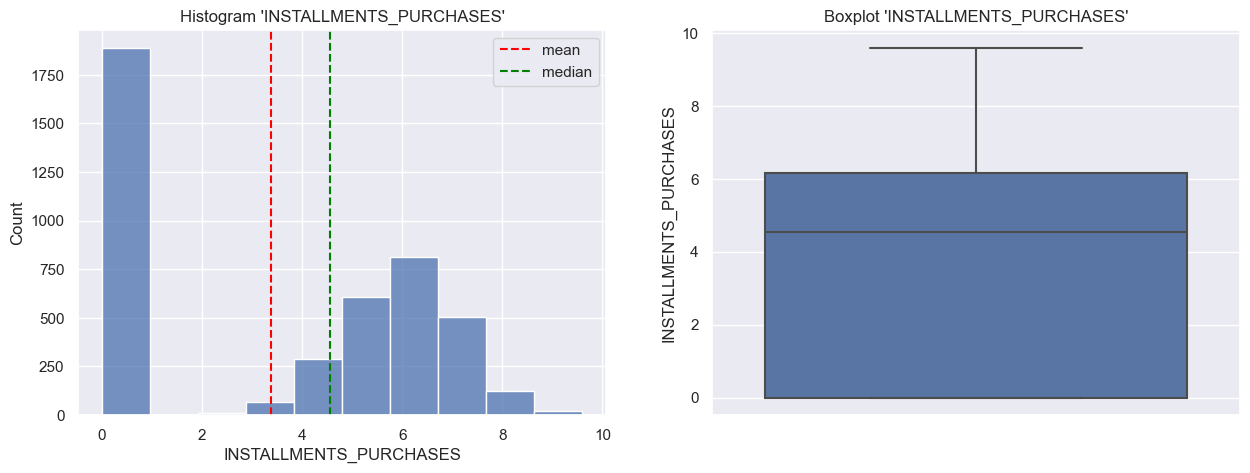

INSTALLMENTS_PURCHASES Kurtosis: -1.74505815395386
INSTALLMENTS_PURCHASES Skewness: -0.03621201597628346
Columns 'INSTALLMENTS_PURCHASES' is normally distributed


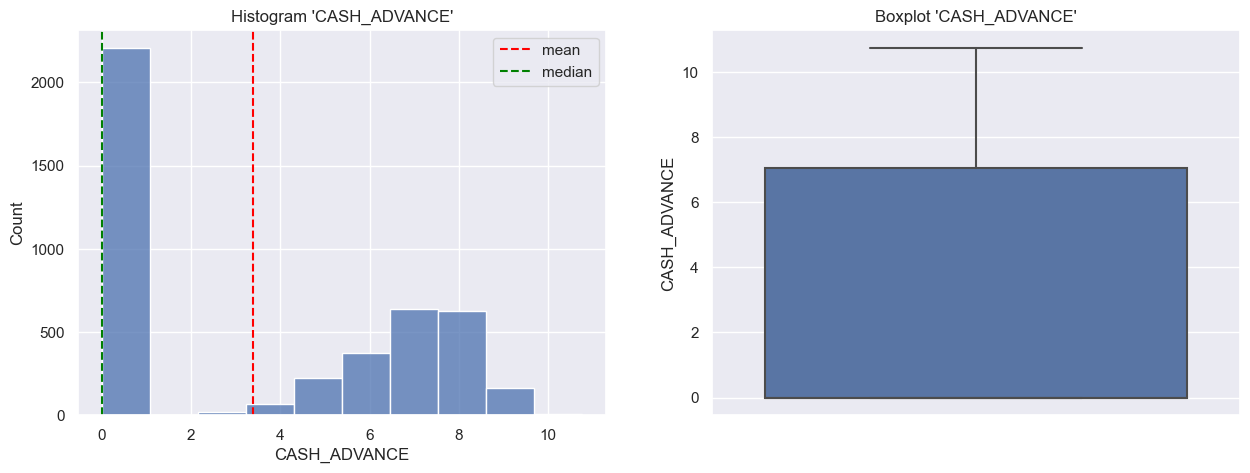

CASH_ADVANCE Kurtosis: -1.7578670724251226
CASH_ADVANCE Skewness: 0.22847078004828558
Columns 'CASH_ADVANCE' is normally distributed


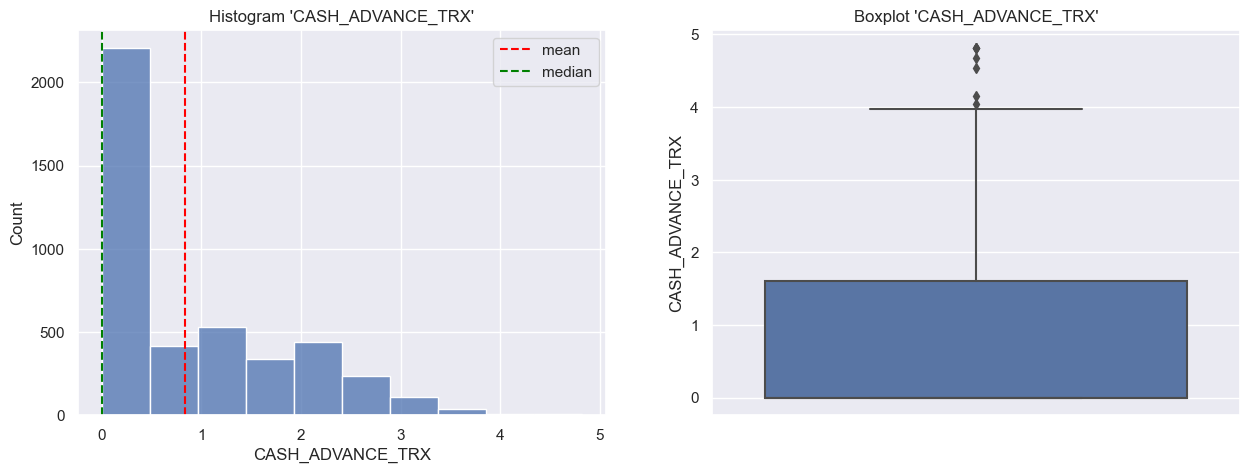

CASH_ADVANCE_TRX Kurtosis: -0.24055800417303042
CASH_ADVANCE_TRX Skewness: 0.9215718872508528
Columns 'CASH_ADVANCE_TRX' is moderately right skewed


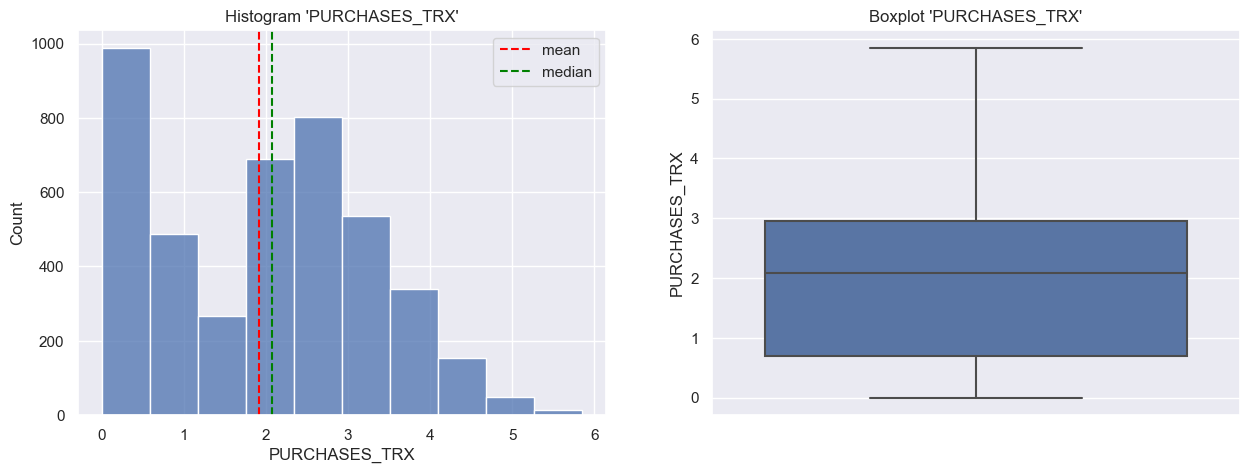

PURCHASES_TRX Kurtosis: -0.9979825309382924
PURCHASES_TRX Skewness: 0.02106694045902823
Columns 'PURCHASES_TRX' is normally distributed


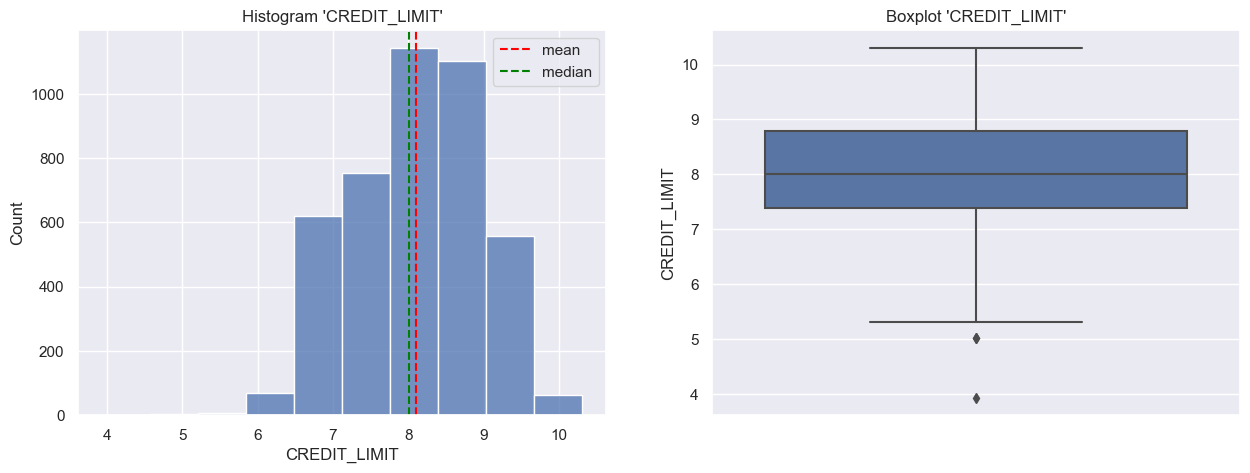

CREDIT_LIMIT Kurtosis: -0.5439009416496856
CREDIT_LIMIT Skewness: -0.12166662930930564
Columns 'CREDIT_LIMIT' is normally distributed


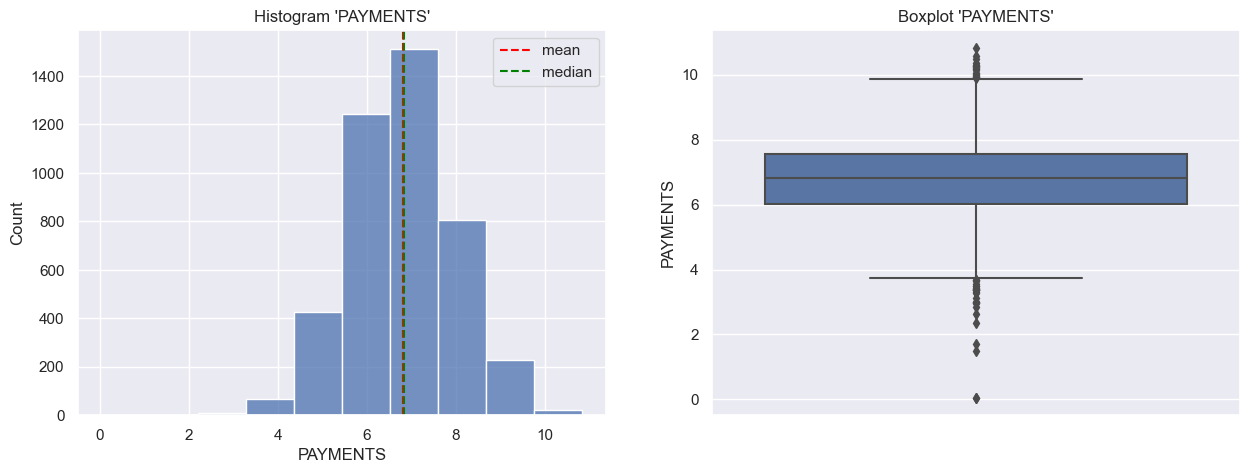

PAYMENTS Kurtosis: 0.5976767620166705
PAYMENTS Skewness: -0.1359319779514621
Columns 'PAYMENTS' is normally distributed


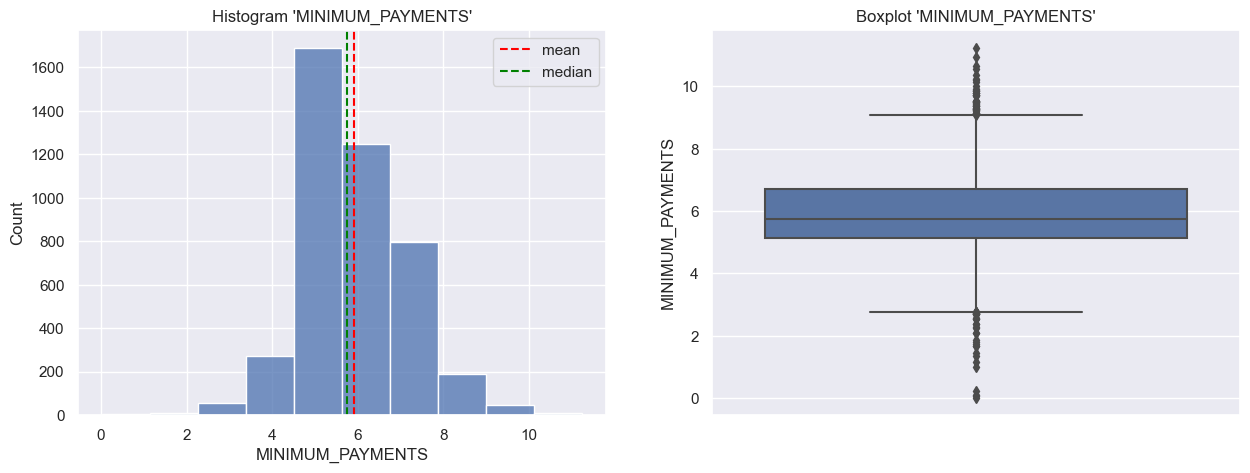

MINIMUM_PAYMENTS Kurtosis: 1.1010374020936156
MINIMUM_PAYMENTS Skewness: 0.222522269709894
Columns 'MINIMUM_PAYMENTS' is normally distributed


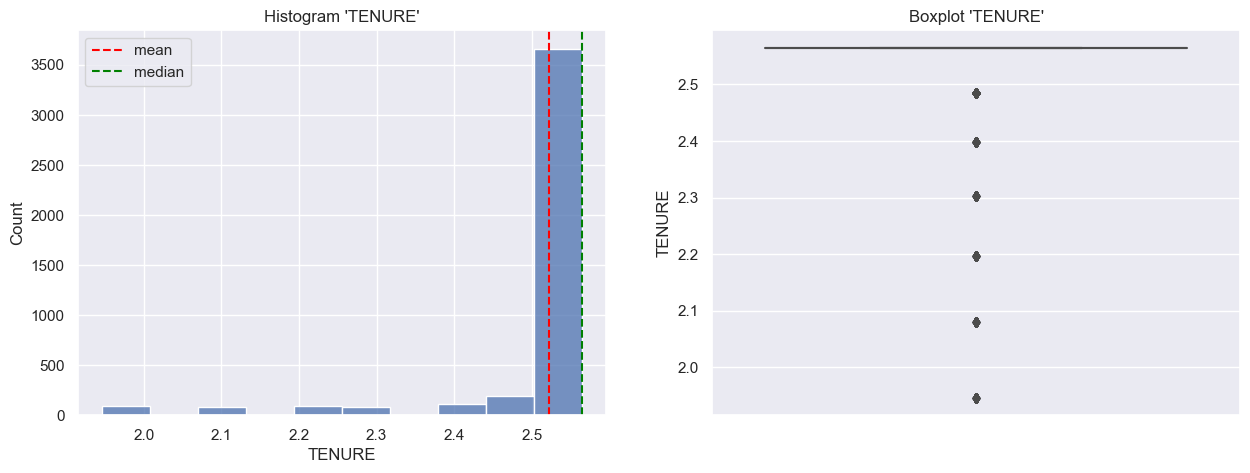

TENURE Kurtosis: 10.109141040983888
TENURE Skewness: -3.2698015719713904
Columns 'TENURE' is highly left skewed


In [173]:
# plot semua fitur pada data train untuk melihat distribusi sekaligus outliernya
for i in range(len(scaled_num_col)):
    plot_diagnostic(data_train, scaled_num_col[i])

In [174]:
# variable container upper dan lower limit semua kolom numerik
upper = []
lower = []

# simpan value upper dan lower ke dalam list yang sudah dibuat sebelumnya
for i in range(len(scaled_num_col)):
    upper_, lower_ = find_skewed_boundaries(df=data_train, variable=scaled_num_col[i], distance=1.5)
    upper.append(upper_)
    lower.append(lower_)

# simpan value upper dan lower ke dictionary sesuai nama fiturnya dengan format (nama_fitur: upper,lower)
low_up_dict = {}
for i in range(len(scaled_num_col)):
    low_up_dict[scaled_num_col[i]]=[lower[i],upper[i]]

In [175]:
# menampilan dicionary lower dan upper limit value suatu fitur
low_up_dict

{'BALANCE': [0.9798890832295974, 11.64982631308342],
 'PURCHASES': [-1.0948213860877973, 11.919507729114487],
 'ONEOFF_PURCHASES': [-9.583518673250357, 15.972531122083927],
 'INSTALLMENTS_PURCHASES': [-9.23196067180818, 15.3866011196803],
 'CASH_ADVANCE': [-10.587740495070355, 17.64623415845059],
 'CASH_ADVANCE_TRX': [-2.4141568686511503, 4.023594781085251],
 'PURCHASES_TRX': [-2.683790517349797, 6.321376677076183],
 'CREDIT_LIMIT': [5.276392347185082, 10.8817026560161],
 'PAYMENTS': [3.684893541806288, 9.904320453234293],
 'MINIMUM_PAYMENTS': [2.768826383972985, 9.074314970322103],
 'TENURE': [2.5649493574615367, 2.5649493574615367]}

In [176]:
#list containing outliers percentage
trimmed_outliers = []
censored_outliers = []

# menghitung dan menampilkan persentase outlier dari tiap fitur
for i in range(len(scaled_num_col)):
    num_outlier = data_train[scaled_num_col[i]][(data_train[scaled_num_col[i]] > upper[i]) | (data_train[scaled_num_col[i]] < lower[i])].shape[0]
    outlier_percentage = num_outlier/data_train.shape[0]*100
    if (outlier_percentage<5):
        trimmed_outliers.append([scaled_num_col[i],outlier_percentage])
    else:
        censored_outliers.append([scaled_num_col[i],outlier_percentage])

print("Trimmed Outliers Consideration:")
for i in trimmed_outliers:
    print(f'\tPercentage of outlier in \033[1m{i[0]}\033[0m is {i[1]:.2f}%')

print("Censored Outliers Consideration:")
for i in censored_outliers:
    print(f'\tPercentage of outlier in \033[1m{i[0]}\033[0m is {i[1]:.2f}%')

Trimmed Outliers Consideration:
	Percentage of outlier in BALANCE is 0.74%
	Percentage of outlier in PURCHASES is 0.00%
	Percentage of outlier in ONEOFF_PURCHASES is 0.00%
	Percentage of outlier in INSTALLMENTS_PURCHASES is 0.00%
	Percentage of outlier in CASH_ADVANCE is 0.00%
	Percentage of outlier in CASH_ADVANCE_TRX is 0.16%
	Percentage of outlier in PURCHASES_TRX is 0.00%
	Percentage of outlier in CREDIT_LIMIT is 0.07%
	Percentage of outlier in PAYMENTS is 1.02%
	Percentage of outlier in MINIMUM_PAYMENTS is 1.78%
Censored Outliers Consideration:
	Percentage of outlier in TENURE is 15.23%


### Censoring/Capping


In [177]:
# # define kolom yang ingin di cap
capped_col = [i[0] for i in censored_outliers]

In [178]:
# replace lower boundary outlier 
data_train.TENURE[data_train.TENURE<low_up_dict['TENURE'][0]] = low_up_dict['TENURE'][0]

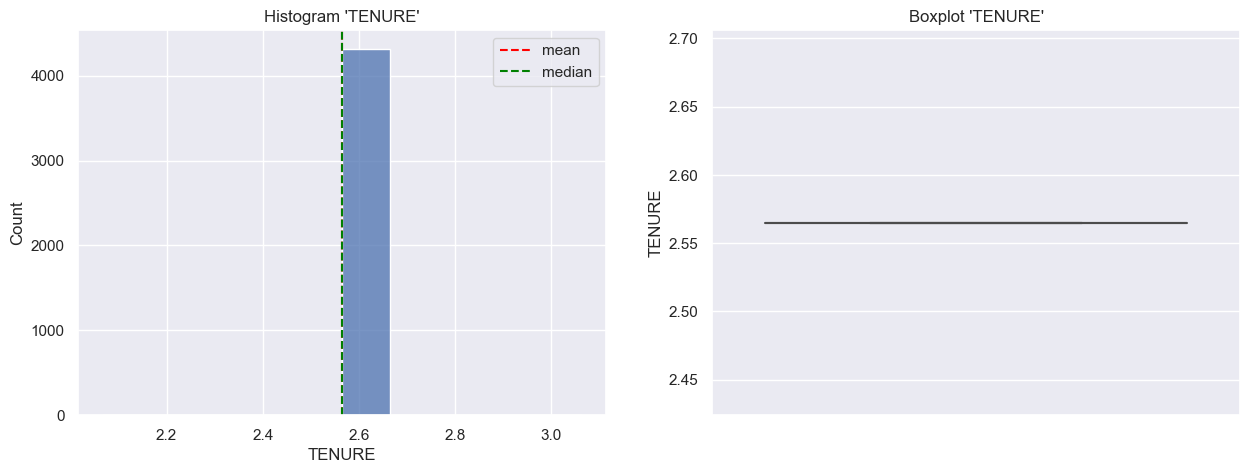

TENURE Kurtosis: 0
TENURE Skewness: 0
Columns 'TENURE' is normally distributed


In [179]:
# plot fitur setelah dilakukkan capping
for i in range(len(capped_col)):
    plot_diagnostic(data_train, capped_col[i])

## Pipelining
### Scaling & Encoding
- Dikethui bahwa distribusi fitur-fitur diatas sudah terdistribusi normal, maka penulis akan menggunakan  *`standard scaler`*.
- Penulis `tidak` menggunakan `encoding` karena pada dataset ini tidak ada kebutuhan akan hal tersebut.
- Penulis akan membungkus fungsi scaling ini kedalam column transformer dengan variabel bernama *`preprocessor`*

In [180]:
#mendefinisikan kolom/fitur numerik yang akan di transform
scaled_num_features = data_train.columns
num_transformer = StandardScaler()

# membuat pipeline data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("mm_scale", num_transformer, scaled_num_features),
    ],
    remainder='passthrough'
)

In [181]:
# for inference
df_infer = data_train.sample(n=100,random_state=42)
df_infer.to_csv("kmeans infer.csv")

In [182]:
# drop inference data from data train
data_train.drop(index=df_infer.index,inplace=True)

In [183]:
# preserve original data train
original_data_train = data_train.copy()

In [184]:
# transform data train from preprocessor
scaled_data_train = preprocessor.fit_transform(data_train)

In [185]:
# construct data train with the appropriate feature/column names
data_train = pd.DataFrame(data=scaled_data_train,columns=original_data_train.columns)

In [186]:
# original data train (before preprocessed)
original_data_train

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     7.525658           0.693147   6.922151          6.357842   
1     4.873949           0.646627   7.268913          6.613371   
2     3.117076           0.646627   5.655012          0.000000   
3     2.855286           0.374693   5.188223          0.000000   
4     6.533291           0.693147   7.814985          7.393571   
...        ...                ...        ...               ...   
4470  9.266003           0.693147   8.954219          0.000000   
4471  7.857604           0.693147   0.000000          0.000000   
4472  6.487247           0.693147   5.581050          5.317139   
4473  8.794040           0.693147   5.965275          5.965275   
4474  3.645635           0.606136   5.898197          0.000000   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   6.083360      7.126162             0.405465   
1                   6.538140      0.000000             0.646627   
2                   5.655012      0.000000             0.510826   
3                   5.188223      0.000000             0.223144   
4                   6.748701      5.538410             0.693147   
...                      ...           ...                  ...   
4470                8.954219      0.000000             0.693147   
4471                0.000000      8.705744             0.000000   
4472                4.135966      0.000000             0.287682   
4473                0.000000      8.438785             0.459532   
4474                5.898197      3.620705             0.606136   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.080042                          0.287682   
1                       0.374693                          0.492477   
2                       0.000000                          0.510826   
3                       0.000000                          0.223144   
4                       0.559616                          0.693147   
...                          ...                               ...   
4470                    0.000000                          0.693147   
4471                    0.000000                          0.000000   
4472                    0.080042                          0.154151   
4473                    0.459532                          0.000000   
4474                    0.000000                          0.510826   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.080042          1.791759       2.772589      7.601402   
1                   0.000000          0.000000       2.995732      8.294300   
2                   0.000000          0.000000       2.833213      8.517393   
3                   0.000000          0.000000       1.386294      8.517393   
4                   0.080042          0.693147       3.583519      8.294300   
...                      ...               ...            ...           ...   
4470                0.000000          0.000000       3.806662      8.987322   
4471                0.223144          2.079442       0.000000      8.006701   
4472                0.000000          0.000000       1.945910      7.313887   
4473                0.348307          2.079442       2.079442      8.853808   
4474                0.154151          0.693147       1.945910      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0     6.485358          7.329996          0.000000  2.564949  
1     7.218275          4.960386          0.628609  2.564949  
2     5.844012          5.054926          0.587787  2.564949  
3     5.439714          4.506607          0.167054  2.564949  
4     7.378842          5.417280          0.080042  2.564949  
...        ...               ...               ...       ...  
4470  7.897091         11.243832          0.000000  2.564949  
4471  8.703772          6.717821          0.167054  2.564949  
4472  5.199213          5.691768          0.000000  

In [187]:
# preprocessed data train ready to be fitted in model
data_train

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.666256           0.483396   0.684515          0.952124   
1    -0.723357           0.117728   0.803074          1.030882   
2    -1.644036           0.117728   0.251278         -1.007478   
3    -1.781226          -2.019794   0.091681         -1.007478   
4     0.146212           0.483396   0.989777          1.271354   
...        ...                ...        ...               ...   
4215  1.578273           0.483396   1.379284         -1.007478   
4216  0.840210           0.483396  -1.682184         -1.007478   
4217  0.122082           0.483396   0.225990          0.631360   
4218  1.330944           0.483396   0.357357          0.831127   
4219 -1.367048          -0.200554   0.334423         -1.007478   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.878738      1.047422             0.145927   
1                   1.025876     -0.943776             1.011348   
2                   0.740152     -0.943776             0.524018   
3                   0.589129     -0.943776            -0.508342   
4                   1.094000      0.603771             1.178286   
...                      ...           ...                  ...   
4215                1.807565     -0.943776             1.178286   
4216               -1.089449      1.488790            -1.309103   
4217                0.248686     -0.943776            -0.276744   
4218               -1.089449      1.414196             0.339949   
4219                0.818831      0.067924             0.866042   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.373311                          0.055411   
1                       0.978572                          0.780663   
2                      -0.740552                          0.845644   
3                      -0.740552                         -0.173142   
4                       1.827013                          1.491309   
...                          ...                               ...   
4215                   -0.740552                          1.491309   
4216                   -0.740552                         -0.963373   
4217                   -0.373311                         -0.417469   
4218                    1.367820                         -0.963373   
4219                   -0.740552                          0.845644   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.227259          0.945112       0.617686     -0.608438   
1                  -0.733253         -0.818848       0.778755      0.237868   
2                  -0.733253         -0.818848       0.661446      0.510354   
3                  -0.733253         -0.818848      -0.382967      0.510354   
4                  -0.227259         -0.136455       1.203030      0.237868   
...                      ...               ...            ...           ...   
4215               -0.733253         -0.818848       1.364100      1.084326   
4216                0.677364          1.228331      -1.383621     -0.113406   
4217               -0.733253         -0.818848       0.020974     -0.959610   
4218                1.468592          1.228331       0.117359      0.921252   
4219                0.241223         -0.136455       0.020974     -1.231954   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT        TENURE  
0    -0.276393          1.172558         -0.562902 -4.440892e-16  
1     0.346250         -0.793992          2.394632 -4.440892e-16  
2    -0.821243         -0.715533          2.202569 -4.440892e-16  
3    -1.164711         -1.170585          0.223068 -4.440892e-16  
4     0.482659         -0.414813         -0.186311 -4.440892e-16  
...        ...               ...               ...           ...  
4215  0.922932          4.420667         -0.562902 -4.440892e-16  
4216  1.608241          0.664511          0.223068 -4.440892e-16  
4217 -1.369027  

## Multicollinearity Checking
Penulis menggunakan VIF sebagai gambaran fitur-fitur apa yang nantinya bisa di reduksi dengan PCA

In [188]:
# the independent variables set
X = data_train

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]

In [189]:
# menampilkan fitur beserta nilai VIF nya terhadap keseluruhan dataset
vif_data.sort_values(by='VIF').reset_index(drop=True)

feature        VIF
0                             TENURE   1.000000
1                       CREDIT_LIMIT   1.366938
2                   PRC_FULL_PAYMENT   1.815440
3                           PAYMENTS   2.025782
4                  BALANCE_FREQUENCY   2.154888
5                   MINIMUM_PAYMENTS   3.411061
6                       CASH_ADVANCE   6.417373
7         ONEOFF_PURCHASES_FREQUENCY   6.768900
8                   ONEOFF_PURCHASES   7.109232
9                            BALANCE   7.146265
10            INSTALLMENTS_PURCHASES   8.256678
11            CASH_ADVANCE_FREQUENCY   9.080282
12                         PURCHASES  12.518409
13  PURCHASES_INSTALLMENTS_FREQUENCY  14.662020
14                  CASH_ADVANCE_TRX  15.550540
15                     PURCHASES_TRX  16.276794
16               PURCHASES_FREQUENCY  17.656556

Total terdapat 17 fitur dengan nilai VIF yang bervariasi

In [190]:
vif_data[vif_data.VIF>5].sort_values(by='VIF').reset_index(drop=True)

feature        VIF
0                       CASH_ADVANCE   6.417373
1         ONEOFF_PURCHASES_FREQUENCY   6.768900
2                   ONEOFF_PURCHASES   7.109232
3                            BALANCE   7.146265
4             INSTALLMENTS_PURCHASES   8.256678
5             CASH_ADVANCE_FREQUENCY   9.080282
6                          PURCHASES  12.518409
7   PURCHASES_INSTALLMENTS_FREQUENCY  14.662020
8                   CASH_ADVANCE_TRX  15.550540
9                      PURCHASES_TRX  16.276794
10               PURCHASES_FREQUENCY  17.656556

- Terdapat 14 dari total 17 fitur yang terlihat memiliki nilai VIF diatas 5, hal ini menandakan adanya *`multicollinearity`* pada 11 fitur tersebut.
- Sebagai gambaran sepertinya 17 fitur pada dataset ini dapat direduksi hingga 4 fitur saja namun hal ini bukanlah suatu kepastian.

## Dimension Reduction with PCA

In [191]:
info_thresh = 0.9
pca = PCA()
pca.fit(data_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= info_thresh) + 1
print(f"{d} fitur setidaknya memuat informasi dataset sebanyak {info_thresh:.2%}")

7 fitur setidaknya memuat informasi dataset sebanyak 90.00%


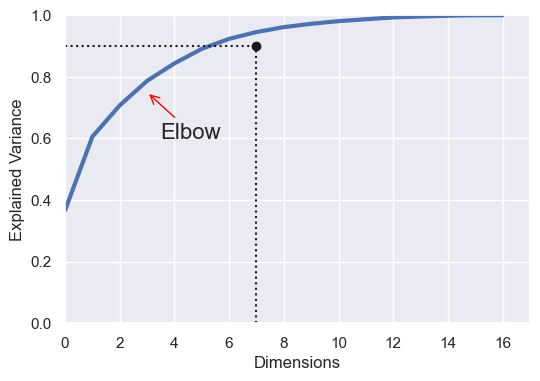

In [192]:
# plot nilai cumulative EVR terhadap dimensi
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 17, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, info_thresh], "k:")
plt.plot([0, d], [info_thresh, info_thresh], "k:")
plt.plot(d, info_thresh, "ko")
plt.annotate("Elbow", xy=(3, 0.75), xytext=(3.5, 0.6),
             arrowprops=dict(arrowstyle="->",color='red'), fontsize=16)
plt.grid(True)
plt.show()

In [193]:
# memakai 90% informasi dataset
pca = PCA(n_components=0.9)
X_reduced = pca.fit_transform(data_train)

In [194]:
# melihat jumlah fitur setelah reduksi dimensi
pca.n_components_

7

## Model Training

In [195]:
# instansiasi classifier dengan default parameter
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_reduced)
                for k in range(2, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

## Model Evaluation
### Elbow Method
Untuk melihat jumlah cluster atau nilai k yang optimal

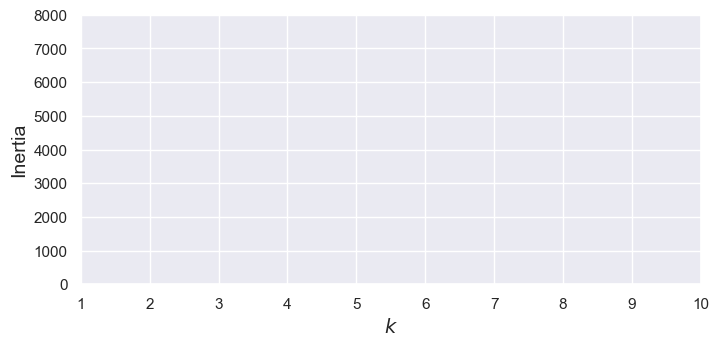

In [196]:
# plot inertia value terhadap k cluster
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 10, 0, 8000])
plt.show()

### Silhouette score
Plotting silhouette score

In [197]:
silhouette_scores = [silhouette_score(X_reduced, model.labels_)
                     for model in kmeans_per_k]

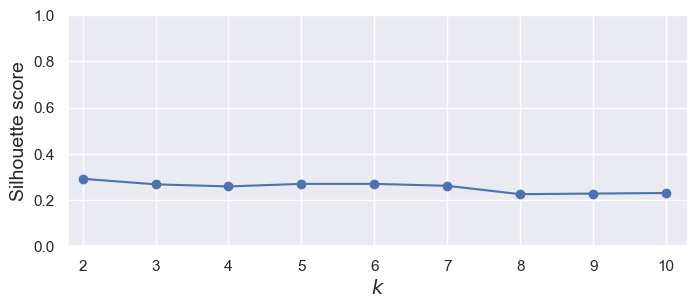

In [198]:
# plot silhouette score terhadap k cluster
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.3, 0.0, 1.0])
plt.show()

In [199]:
# menampilkan silhouette score dari k=2 hingga k=10
silhouette_scores

[0.2921703329637877,
 0.26801482073836563,
 0.258916968585355,
 0.27004710100923135,
 0.27004962153131107,
 0.2615711336366378,
 0.22540981648290376,
 0.2280435035272824,
 0.2305285994301353]

In [200]:
np.argmax(silhouette_scores)

0

Menurut silhouette score jumlah cluster yang optimal adalah 2

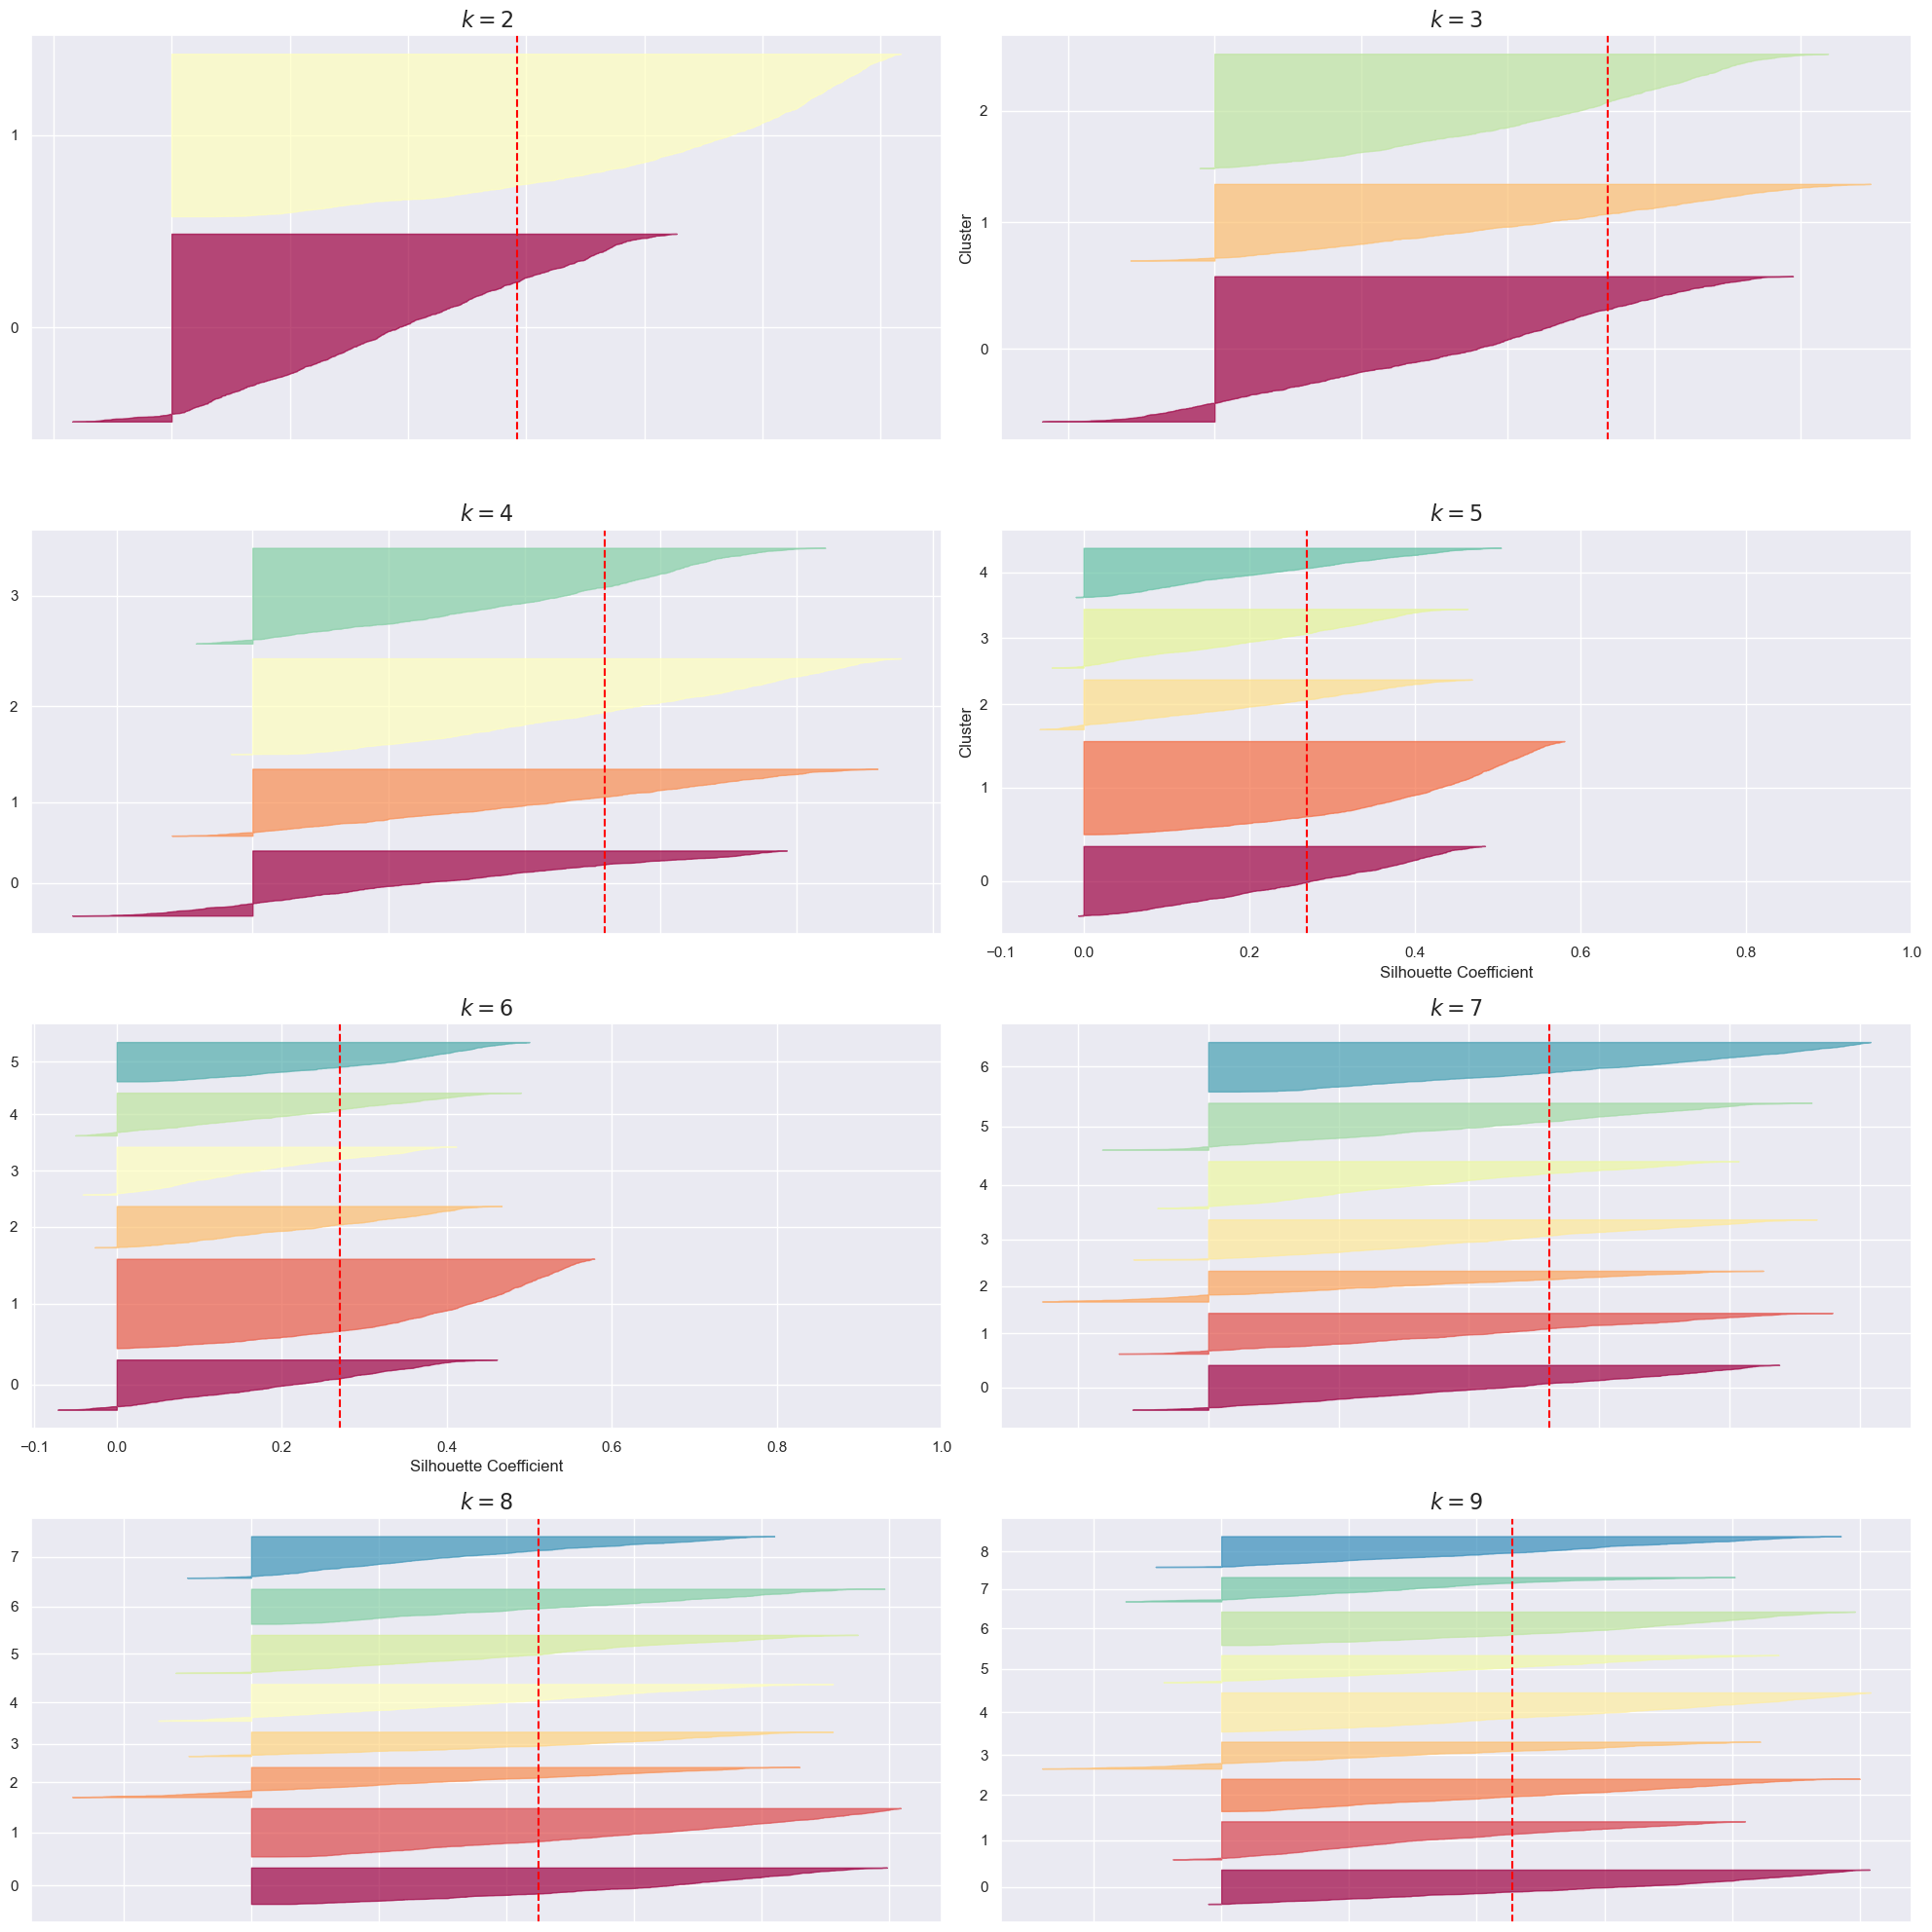

In [201]:
# plot silhouette score
plt.figure(figsize=(20, 20))

for k in range(2,10):
    plt.subplot(4, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_reduced, y_pred)

    padding = len(X_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.tight_layout()

In [202]:
def plot_silhouette(model,range_n_clusters,X,model_name):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

### Decision Boundaries
Plotting decision boundaries dengan diagram Voronoi

In [203]:
# plot decision boundary function
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [204]:
# mereduksi dimensi untuk plotting
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data_train)

df_pca3 = pd.DataFrame(X_pca) 
df_pca3.columns = ['PC1', 'PC2', 'PC3']
df_pca3.head()

PC1       PC2       PC3
0 -0.069685 -1.581740 -0.754475
1 -3.317858  0.322786  0.601165
2 -2.071546  2.043809 -1.099398
3 -0.557556  3.218600  0.070533
4 -2.651142 -1.803618  0.171193

In [205]:
kmeans_per_k[3].labels_

array([1, 3, 2, ..., 2, 1, 2], dtype=int32)

In [206]:
df_pca3['cluster'] = kmeans_per_k[3].labels_

In [207]:
import plotly.express as px
fig = px.scatter_3d(df_pca3, x=df_pca3['PC1'], y= df_pca3['PC2'], z=df_pca3['PC3'], color=df_pca3['cluster']) 
fig.show()

In [208]:
# mereduksi dimensi untuk plotting
pca = PCA(n_components=2)
X_pca2d = pca.fit_transform(data_train)

# Apply k-means to cluster the data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca2d)


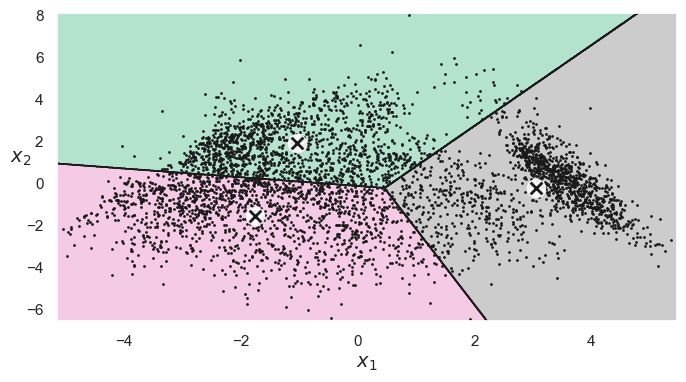

In [209]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_pca2d)
plt.show()

Banyak data yang tersebar / sparse, cluster yang terbentuk belum memperlihatkan pemisahan kelompok yang jelas.

For n_clusters = 2 The average silhouette_score is : 0.29200312663321304
For n_clusters = 3 The average silhouette_score is : 0.2680413112636687
For n_clusters = 4 The average silhouette_score is : 0.2593380631194805
For n_clusters = 5 The average silhouette_score is : 0.269997292477706
For n_clusters = 6 The average silhouette_score is : 0.2700555347952768
For n_clusters = 7 The average silhouette_score is : 0.2613959965470332
For n_clusters = 8 The average silhouette_score is : 0.22564063671066362
For n_clusters = 9 The average silhouette_score is : 0.22802371657623807


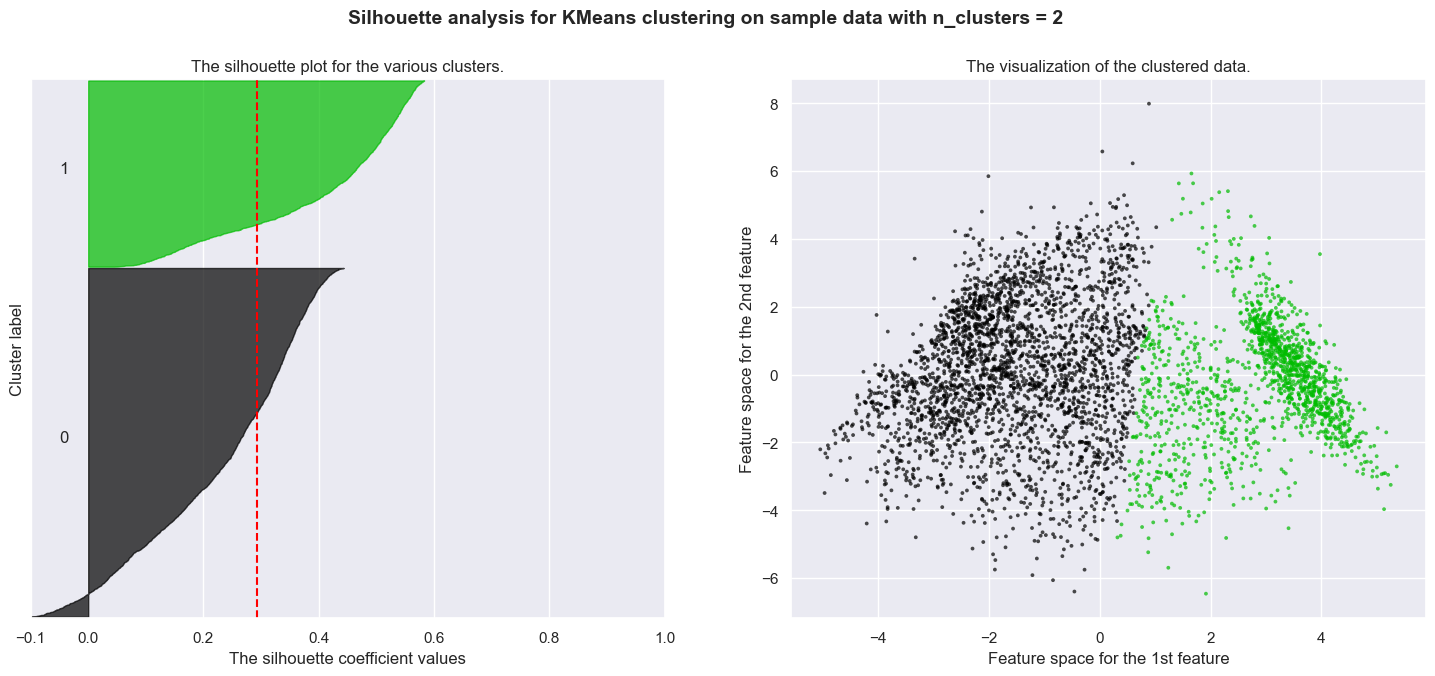

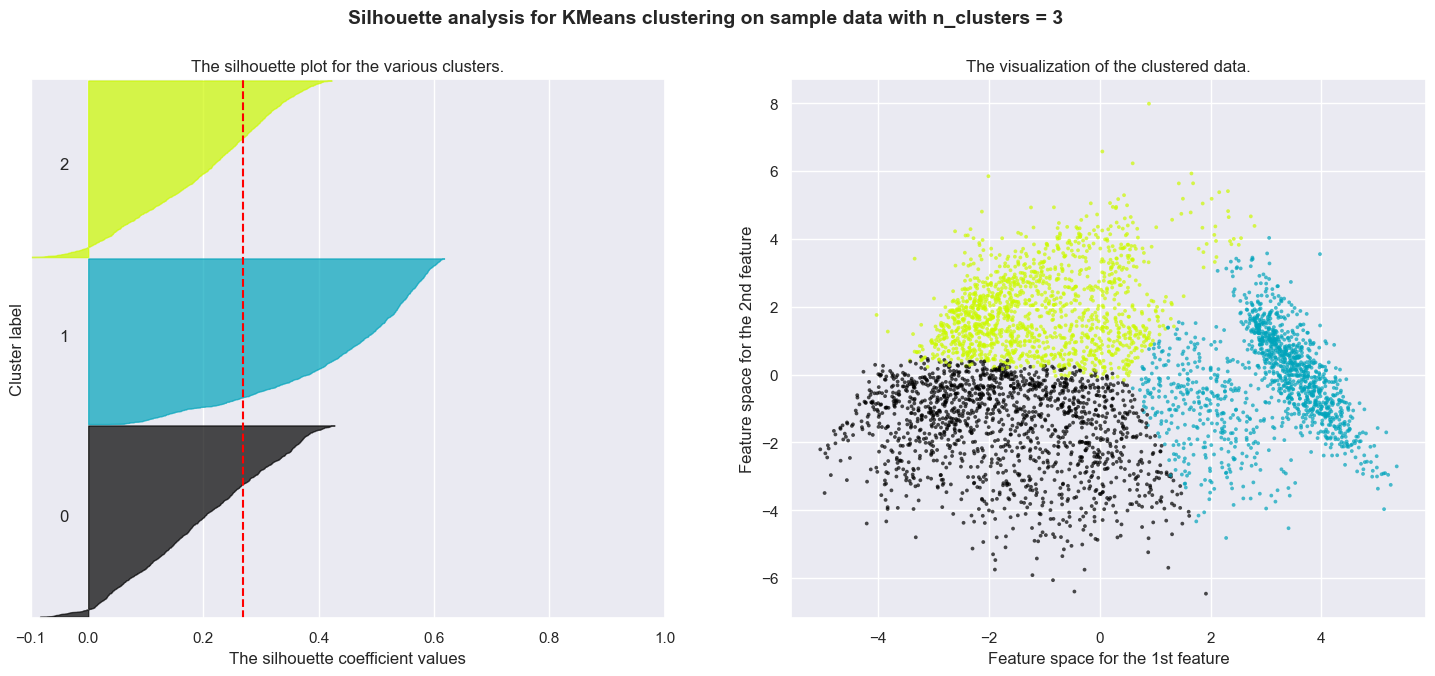

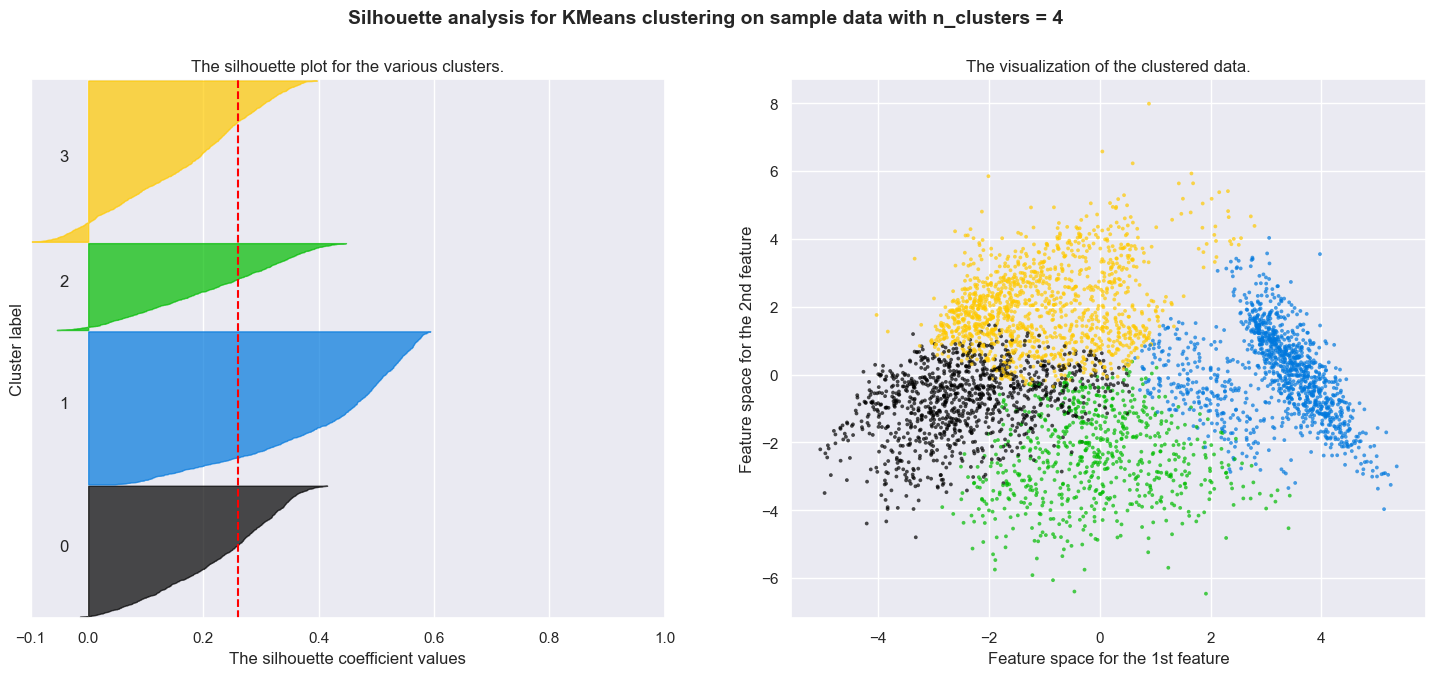

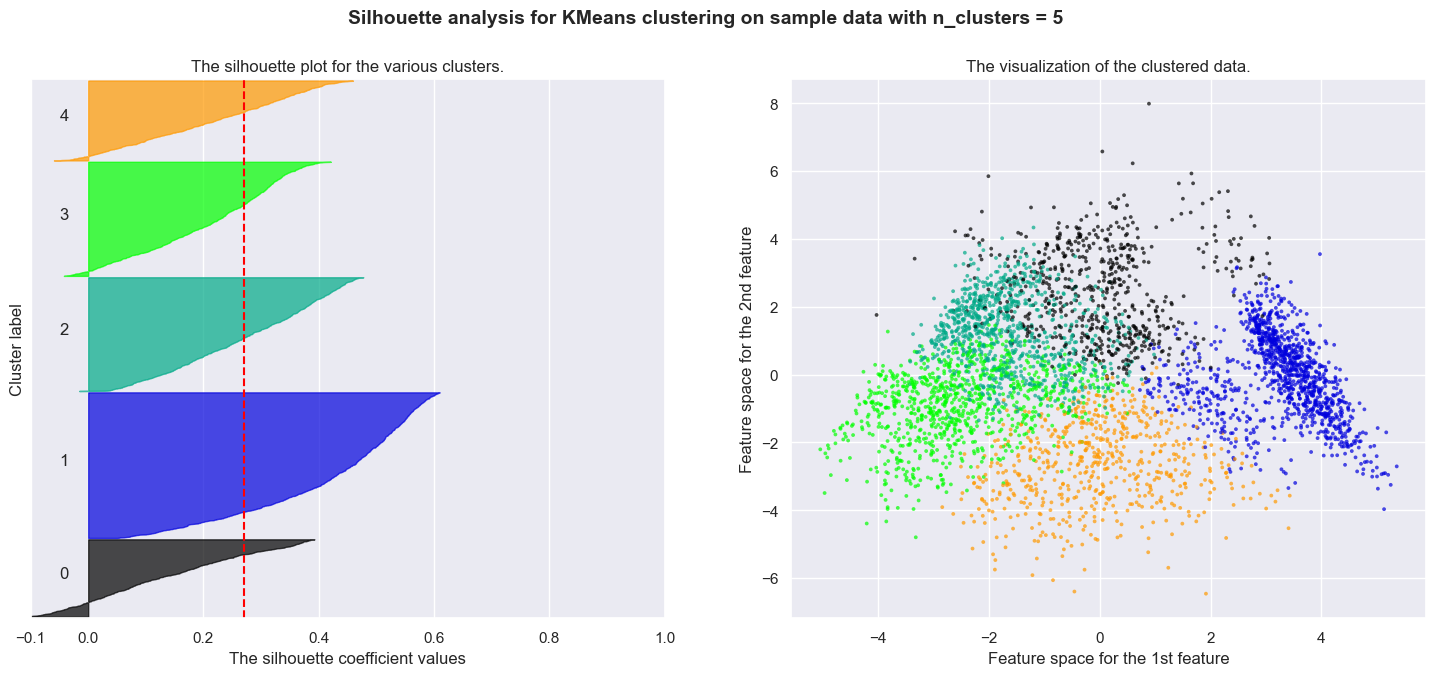

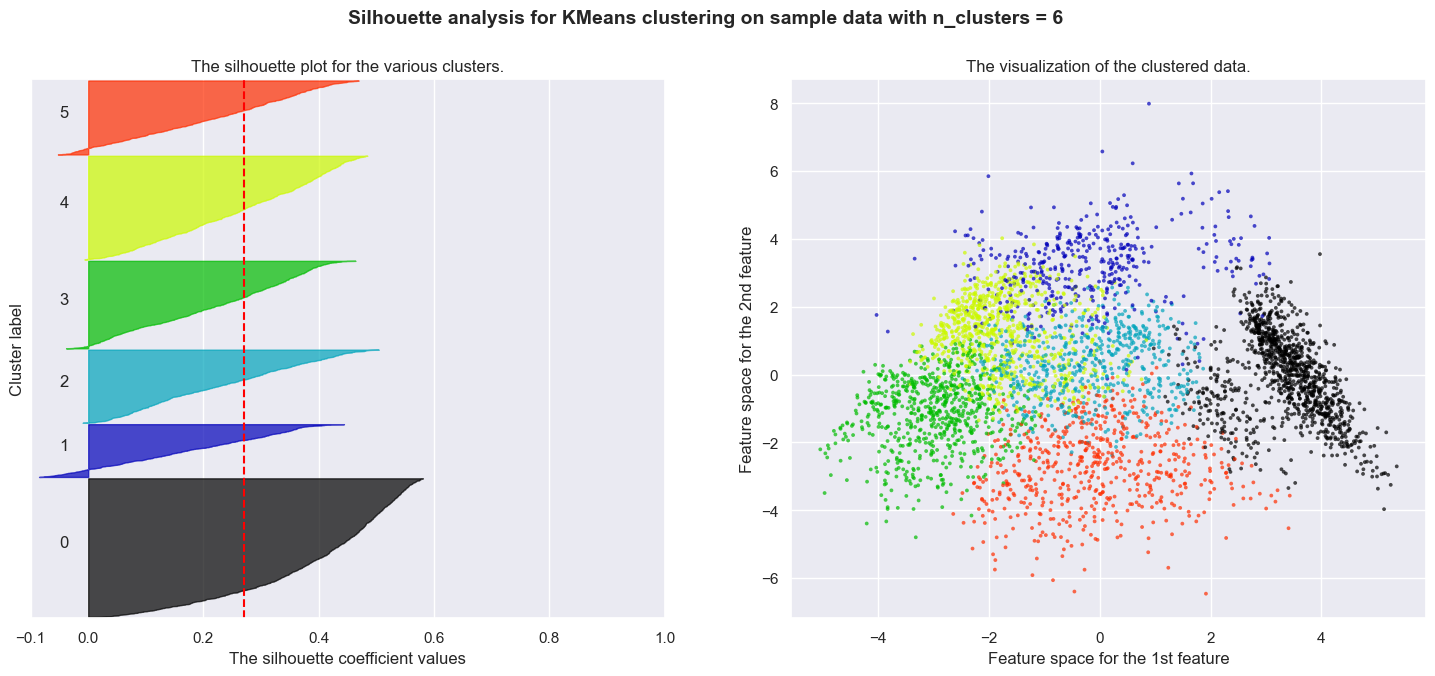

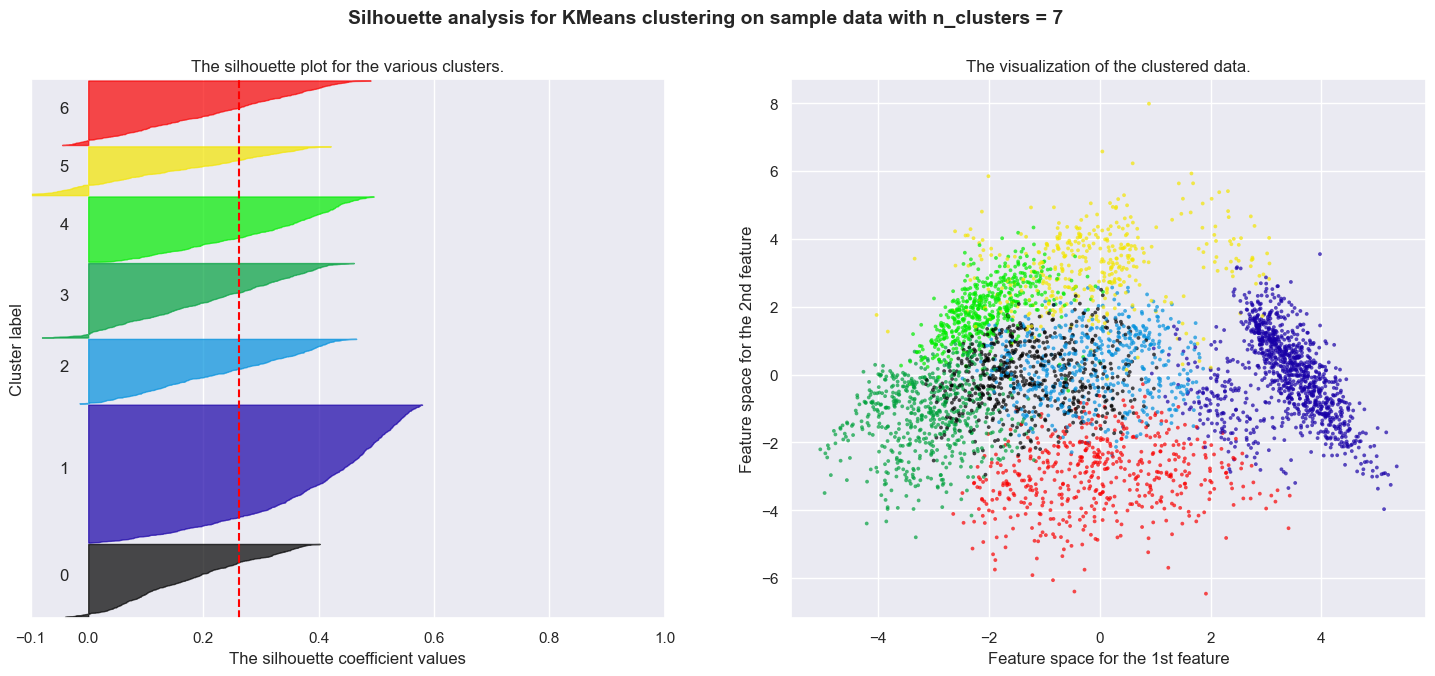

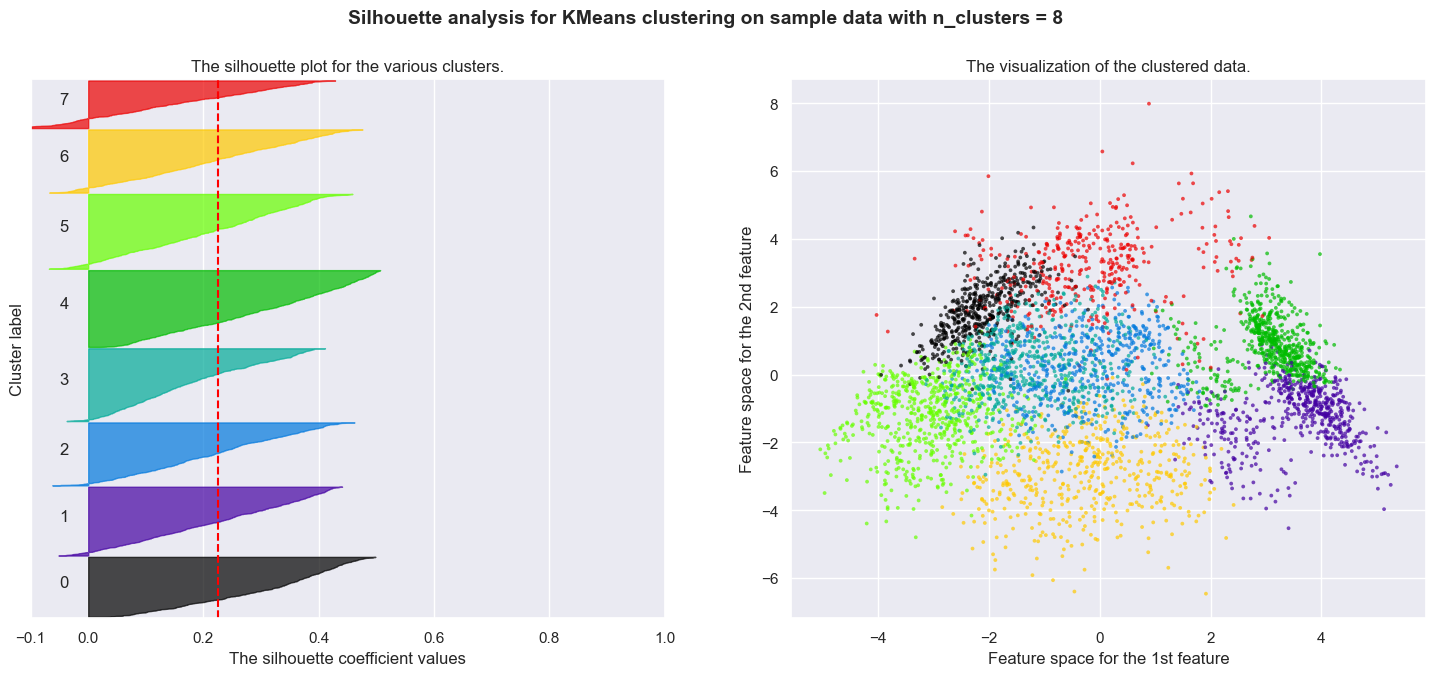

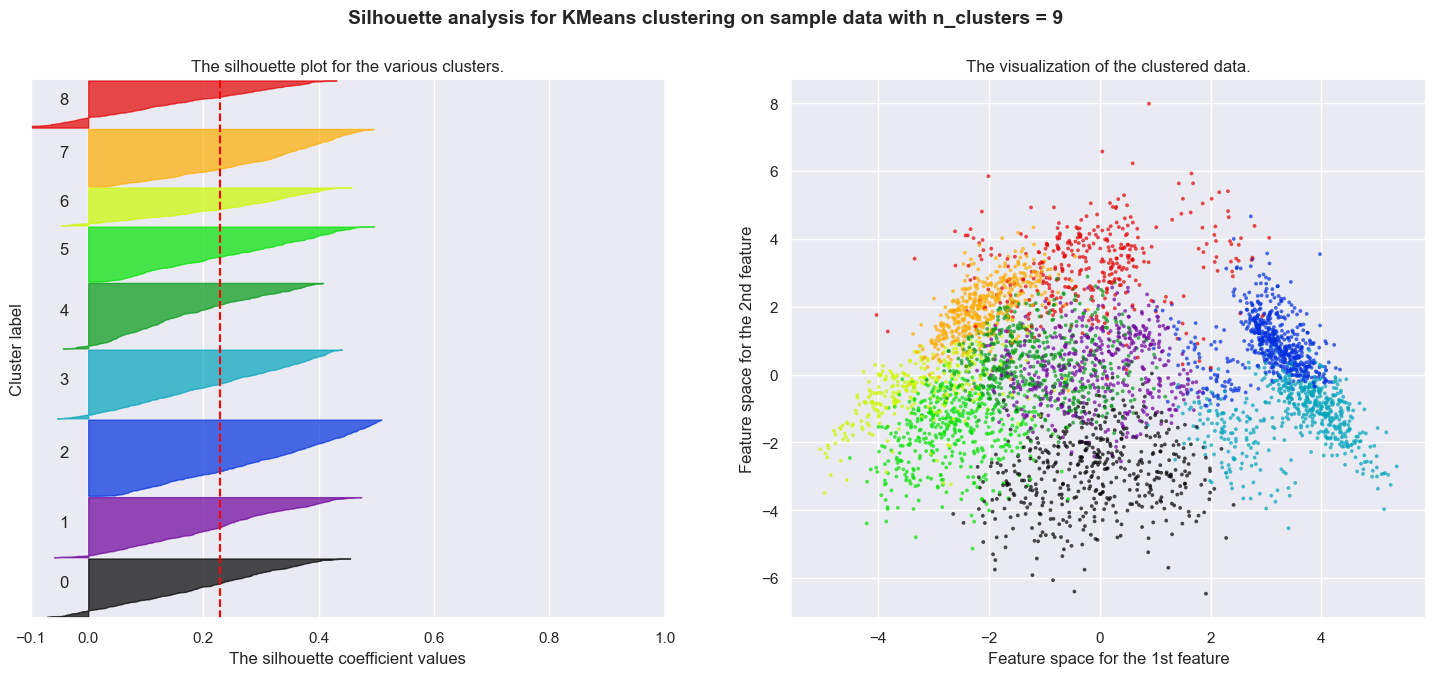

In [210]:
plot_silhouette(KMeans,[2,3,4,5,6,7,8,9],X_reduced,'KMeans')

## Evaluasi Cluster Terbentuk

In [211]:
# prediksi cluster pada original data train
original_data_train['pred_cluster'] = kmeans_per_k[3].predict(X_reduced)

### Cluster 1

In [212]:
# cluster 1
cluster_1 = original_data_train[original_data_train.pred_cluster==0]
cluster_1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     2.855286           0.374693   5.188223          0.000000   
19    3.695707           0.435318   6.069559          6.069559   
26    3.397924           0.310155   5.137209          5.137209   
34    1.738157           0.356675   3.394508          0.000000   
36    2.898195           0.597837   5.210032          3.543854   
...        ...                ...        ...               ...   
4426  4.524678           0.646627   6.554774          6.554774   
4430  6.049080           0.546544   5.846034          5.846034   
4433  3.947463           0.223144   0.000000          0.000000   
4449  5.679024           0.693147   4.867534          4.867534   
4452  7.051822           0.693147   5.690359          5.690359   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                   5.188223      0.000000             0.223144   
19                  0.000000      0.000000             0.287682   
26                  0.000000      0.000000             0.080042   
34                  3.394508      0.000000             0.356675   
36                  5.007296      4.744226             0.223144   
...                      ...           ...                  ...   
4426                0.000000      0.000000             0.287682   
4430                0.000000      0.000000             0.223144   
4433                0.000000      6.795640             0.000000   
4449                0.000000      0.000000             0.080042   
4452                0.000000      0.000000             0.287682   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.000000                          0.223144   
19                      0.287682                          0.000000   
26                      0.080042                          0.000000   
34                      0.000000                          0.251314   
36                      0.080042                          0.080042   
...                          ...                               ...   
4426                    0.287682                          0.000000   
4430                    0.223144                          0.000000   
4433                    0.000000                          0.000000   
4449                    0.080042                          0.000000   
4452                    0.287682                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.000000          0.000000       1.386294      8.517393   
19                  0.000000          0.000000       2.079442      7.313887   
26                  0.000000          0.000000       0.693147      7.090910   
34                  0.000000          0.000000       1.386294      7.313887   
36                  0.080042          0.693147       1.609438      8.699681   
...                      ...               ...            ...           ...   
4426                0.000000          0.000000       1.945910      8.071219   
4430                0.000000          0.000000       1.609438      9.047939   
4433                0.117783          1.098612       0.000000      7.313887   
4449                0.000000          0.000000       0.693147      8.612685   
4452                0.000000          0.000000       1.609438      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  pred_cluster  
3     5.439714          4.506607          0.167054  2.564949             0  
19    6.615755          4.689959          0.000000  2.564949             0  
26    5.121929          3.779116          0.000000  2.564949             0  
34    3.566757          4.117998          0.693147  2.564949             0  
36    5.545468          4.549963          0.182322  2.564949             0  
...        ...               ...               ...       ...           ...  
4426  6.701202          4.950006          0.095310  2.564949             0  
443

In [213]:
cluster_1.describe()

BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
count  617.000000         617.000000  617.000000        617.000000   
mean     3.983186           0.431995    4.889335          3.644605   
std      1.928289           0.190870    1.854877          2.708985   
min      0.000000           0.000000    0.000000          0.000000   
25%      2.505515           0.251314    4.248495          0.000000   
50%      3.838528           0.405465    5.173661          4.603469   
75%      5.462562           0.646627    6.130074          5.846034   
max      7.603548           0.693147    8.281724          8.281724   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              617.000000    617.000000           617.000000   
mean                 1.694888      0.975426             0.191579   
std                  2.394056      2.214622             0.147254   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.080042   
50%                  0.000000      0.000000             0.154151   
75%                  4.246779      0.000000             0.287682   
max                  7.728970      8.357757             0.693147   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  617.000000                        617.000000   
mean                     0.106638                          0.084172   
std                      0.113137                          0.148853   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.080042                          0.000000   
75%                      0.154151                          0.154151   
max                      0.693147                          0.693147   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              617.000000        617.000000     617.000000    617.000000   
mean                 0.019458          0.170454       1.274779      7.855973   
std                  0.048633          0.414633       0.708654      0.813013   
min                  0.000000          0.000000       0.000000      5.017280   
25%                  0.000000          0.000000       0.693147      7.313887   
50%                  0.000000          0.000000       1.098612      7.824446   
75%                  0.000000          0.000000       1.791759      8.517393   
max                  0.405465          2.564949       3.737670     10.043293   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT        TENURE  \
count  617.000000        617.000000        617.000000  6.170000e+02   
mean     5.993704          4.696147          0.121933  2.564949e+00   
std      1.195937          1.009484          0.212388  2.133358e-14   
min      0.054929          0.018982          0.000000  2.564949e+00   
25%      5.266761          4.253894          0.000000  2.564949e+00   
50%      5.951721          4.833639          0.000000  2.564949e+00   
75%      6.791267          5.275836          0.167054  2.564949e+00   
max     10.274705          7.878382          0.693147  2.564949e+00   

       pred_cluster  
count         617.0  
mean            0.0  
std             0.0  
min             0.0  
25%             0.0  
50%             0.0  
75%             0.0  
max             0.0

Customer pada golongan `cluster 1` memiliki rata-rata balance sebesar `$600`, relatif `sering` mengupdate balance, dengan rata-rata jumlah pembelian sebesar `$725`, pembelian tertinggi dalam satu kali transaksi `$100`, pembelian barang secara kredit dengan nominal `$500` dengan uang muka `$168`, customer pada golongan ini relatif `konsumtif` dengan nilai rata-rata purchase frequency sebesar `0.87`, customer cluster ini `jarang` membeli barang dalam satu kali pembelian, `sering` melakukan pembelian secara cicilan, `jarang membayar uang muka`, `banyak` melakukan transaksi dengan ketentuan uang muka, `16x` melakukan rata-rata transaksi, limit credit sekitar `$3200`, minimum membayar cicilan rata-rata sebesar `$400,` rata-rata membayar `27%` kewajiban cicilannya, dan menyicil dengan tenor `11` bulan.

### Cluster 2

In [214]:
# cluster 2
cluster_2=original_data_train[original_data_train.pred_cluster==1]
cluster_2

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     7.525658           0.693147   6.922151          6.357842   
10    5.566955           0.693147   6.513645          6.513645   
15    8.668521           0.693147   7.127959          7.127959   
18    7.075877           0.693147   5.589792          0.000000   
28    8.563560           0.693147   7.485374          6.986243   
...        ...                ...        ...               ...   
4438  7.662048           0.693147   6.498342          6.498342   
4443  5.644517           0.693147   7.004147          7.004147   
4451  8.833032           0.693147   5.572534          5.572534   
4470  9.266003           0.693147   8.954219          0.000000   
4473  8.794040           0.693147   5.965275          5.965275   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   6.083360      7.126162             0.405465   
10                  0.000000      6.170899             0.459532   
15                  0.000000      7.900435             0.405465   
18                  5.589792      6.745058             0.510826   
28                  6.552708      6.490631             0.693147   
...                      ...           ...                  ...   
4438                0.000000      7.577732             0.559616   
4443                0.000000      6.882489             0.693147   
4451                0.000000      8.024462             0.154151   
4470                8.954219      0.000000             0.693147   
4473                0.000000      8.438785             0.459532   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.080042                          0.287682   
10                      0.459532                          0.000000   
15                      0.405465                          0.000000   
18                      0.000000                          0.510826   
28                      0.510826                          0.693147   
...                          ...                               ...   
4438                    0.559616                          0.000000   
4443                    0.693147                          0.000000   
4451                    0.154151                          0.000000   
4470                    0.000000                          0.693147   
4473                    0.459532                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.080042          1.791759       2.772589      7.601402   
10                  0.223144          1.945910       3.401197      5.707110   
15                  0.459532          2.397895       2.944439      8.853808   
18                  0.080042          1.945910       2.197225      6.908755   
28                  0.154151          1.791759       4.543295      9.741027   
...                      ...               ...            ...           ...   
4438                0.080042          1.098612       3.218876      7.824446   
4443                0.223144          2.197225       2.772589      8.648397   
4451                0.287682          2.639057       1.791759      9.472782   
4470                0.000000          0.000000       3.806662      8.987322   
4473                0.348307          2.079442       2.079442      8.853808   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  pred_cluster  
0     6.485358          7.329996          0.000000  2.564949             1  
10    7.048677          6.077701          0.241162  2.564949             1  
15    7.161424          7.334473          0.000000  2.564949             1  
18    4.794648          9.060475          0.000000  2.564949             1  
28    7.116237          7.076359          0.000000  2.564949             1  
...        ...               ...               ...       ...           ...  
4438  6.331071          6.105317          0.000000  2.564949             1  
444

In [215]:
cluster_2.describe()

BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
count  634.000000         634.000000  634.000000        634.000000   
mean     7.818043           0.680893    6.866871          5.256586   
std      0.865887           0.038035    0.980539          2.644562   
min      5.133448           0.435318    4.011868          0.000000   
25%      7.224398           0.693147    6.149355          4.798462   
50%      7.916068           0.693147    6.837348          6.124481   
75%      8.508775           0.693147    7.518588          7.007178   
max      9.687605           0.693147    9.594725          9.562123   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              634.000000    634.000000           634.000000   
mean                 4.945840      7.366372             0.525528   
std                  2.630866      1.152061             0.172435   
min                  0.000000      0.000000             0.080042   
25%                  4.510860      6.736121             0.405465   
50%                  5.783852      7.516411             0.597837   
75%                  6.759031      8.164422             0.693147   
max                  9.594725     10.760839             0.693147   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  634.000000                        634.000000   
mean                     0.259121                          0.391006   
std                      0.207916                          0.258365   
min                      0.000000                          0.000000   
25%                      0.080042                          0.154151   
50%                      0.223144                          0.459532   
75%                      0.405465                          0.650588   
max                      0.693147                          0.693147   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              634.000000        634.000000     634.000000    634.000000   
mean                 0.287952          2.011235       2.893304      8.474994   
std                  0.156190          0.796114       0.868842      0.740244   
min                  0.000000          0.000000       0.693147      5.707110   
25%                  0.154151          1.386294       2.302585      8.006701   
50%                  0.287682          1.945910       2.772589      8.537000   
75%                  0.405465          2.564949       3.496508      9.047939   
max                  0.810930          4.820282       5.852202      9.903538   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT        TENURE  \
count  634.000000        634.000000        634.000000  6.340000e+02   
mean     7.565428          6.923502          0.030410  2.564949e+00   
std      0.958784          0.967992          0.081509  2.177755e-14   
min      4.122491          4.487948          0.000000  2.564949e+00   
25%      6.938835          6.257107          0.000000  2.564949e+00   
50%      7.527879          6.923049          0.000000  2.564949e+00   
75%      8.209581          7.510049          0.000000  2.564949e+00   
max     10.572588         11.243832          0.693147  2.564949e+00   

       pred_cluster  
count         634.0  
mean            1.0  
std             0.0  
min             1.0  
25%             1.0  
50%             1.0  
75%             1.0  
max             1.0

Customer pada golongan `cluster 2` memiliki rata-rata balance sebesar `$800`, relatif `sering` mengupdate balance, dengan rata-rata jumlah pembelian sebesar `$260`, pembelian tertinggi dalam satu kali transaksi `$200`, pembelian barang secara kredit dengan nominal `$50` dengan uang muka `$300`, customer pada golongan ini relatif `jarang melakukan transaksi `dengan nilai rata-rata purchase frequency sebesar `0.2`, customer cluster ini `jarang` membeli barang dalam satu kali pembelian, `jarang` melakukan pembelian secara cicilan, `jarang membayar uang muka`, `jarang` melakukan transaksi dengan uang muka, `1x` melakukan rata-rata transaksi secara `cash`, limit credit sekitar `$3100`, minimum membayar cicilan rata-rata sebesar `$350,` rata-rata membayar `9%` kewajiban cicilannya, dan menyicil dengan tenor `11` bulan.

### Cluster 3

In [216]:
# cluster 3
cluster_3=original_data_train[original_data_train.pred_cluster==2]
cluster_3

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2     3.117076           0.646627   5.655012          0.000000   
7     8.599763           0.693147   6.202738          0.000000   
8     7.231345           0.693147   5.888878          0.000000   
9     5.473716           0.693147   7.144431          5.141664   
12    4.176883           0.693147   6.296372          0.000000   
...        ...                ...        ...               ...   
4453  3.376829           0.693147   5.980909          3.824284   
4466  4.842562           0.693147   6.447306          0.000000   
4469  4.681150           0.646627   4.154655          0.000000   
4472  6.487247           0.693147   5.581050          5.317139   
4474  3.645635           0.606136   5.898197          0.000000   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                   5.655012      0.000000             0.510826   
7                   6.202738      0.000000             0.405465   
8                   5.888878      0.000000             0.510826   
9                   7.000362      0.000000             0.693147   
12                  6.296372      0.000000             0.606136   
...                      ...           ...                  ...   
4453                5.860786      0.000000             0.693147   
4466                6.447306      0.000000             0.693147   
4469                4.154655      0.000000             0.241162   
4472                4.135966      0.000000             0.287682   
4474                5.898197      3.620705             0.606136   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                       0.000000                          0.510826   
7                       0.000000                          0.405465   
8                       0.000000                          0.510826   
9                       0.080042                          0.693147   
12                      0.000000                          0.559616   
...                          ...                               ...   
4453                    0.095310                          0.641854   
4466                    0.000000                          0.650588   
4469                    0.000000                          0.167054   
4472                    0.080042                          0.154151   
4474                    0.000000                          0.510826   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                   0.000000          0.000000       2.833213      8.517393   
7                   0.000000          0.000000       1.945910      9.392745   
8                   0.000000          0.000000       2.197225      6.908755   
9                   0.000000          0.000000       3.850148      7.496097   
12                  0.000000          0.000000       2.397895      8.922792   
...                      ...               ...            ...           ...   
4453                0.000000          0.000000       2.484907      6.908755   
4466                0.000000          0.000000       2.564949      6.908755   
4469                0.000000          0.000000       1.386294      8.517393   
4472                0.000000          0.000000       1.945910      7.313887   
4474                0.154151          0.693147       1.945910      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  pred_cluster  
2     5.844012          5.054926          0.587787  2.564949             2  
7     7.256008          7.273320          0.000000  2.564949             2  
8     4.759171          9.515277          0.000000  2.564949             2  
9     6.593206          5.249302          0.405465  2.564949             2  
12    5.935073          5.326998          0.310155  2.564949             2  
...        ...               ...               ...       ...           ...  
4453  5.864387          4.979278          0.693147  2.564949             2  
446

In [217]:
cluster_3.describe()

BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
count  906.000000         906.000000  906.000000        906.000000   
mean     5.013608           0.650093    6.013249          0.988448   
std      1.601834           0.083080    0.872714          2.000042   
min      0.638111           0.241162    3.186766          0.000000   
25%      3.703353           0.646627    5.480243          0.000000   
50%      4.782755           0.693147    6.061049          0.000000   
75%      6.547854           0.693147    6.565184          0.000000   
max      8.844885           0.693147    8.839068          7.030698   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              906.000000    906.000000           906.000000   
mean                 5.925207      0.611277             0.571056   
std                  0.889192      1.837868             0.143880   
min                  3.186766      0.000000             0.080042   
25%                  5.365193      0.000000             0.459532   
50%                  5.952061      0.000000             0.628609   
75%                  6.477168      0.000000             0.693147   
max                  8.839068      8.333268             0.693147   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  906.000000                        906.000000   
mean                     0.024964                          0.542558   
std                      0.058575                          0.155938   
min                      0.000000                          0.080042   
25%                      0.000000                          0.405465   
50%                      0.000000                          0.606136   
75%                      0.000000                          0.693147   
max                      0.693147                          0.693147   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              906.000000        906.000000     906.000000    906.000000   
mean                 0.012153          0.105351       2.499038      7.684540   
std                  0.040021          0.332984       0.557197      0.706172   
min                  0.000000          0.000000       0.693147      5.707110   
25%                  0.000000          0.000000       2.079442      7.090910   
50%                  0.000000          0.000000       2.564949      7.601402   
75%                  0.000000          0.000000       2.772589      8.160804   
max                  0.356675          2.197225       4.595120      9.798183   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT        TENURE  \
count  906.000000        906.000000        906.000000  9.060000e+02   
mean     6.198864          5.460218          0.222869  2.564949e+00   
std      0.909146          1.060561          0.255307  2.577140e-14   
min      2.855632          1.153040          0.000000  2.564949e+00   
25%      5.609046          4.941059          0.000000  2.564949e+00   
50%      6.220380          5.161059          0.087011  2.564949e+00   
75%      6.799622          5.794795          0.441833  2.564949e+00   
max      9.028684         10.558754          0.693147  2.564949e+00   

       pred_cluster  
count         906.0  
mean            2.0  
std             0.0  
min             2.0  
25%             2.0  
50%             2.0  
75%             2.0  
max             2.0

Customer pada golongan `cluster 3` memiliki rata-rata balance sebesar `$1700`, relatif `sering` mengupdate balance, dengan rata-rata jumlah pembelian sebesar `$2100`, pembelian tertinggi dalam satu kali transaksi `$1100`, pembelian barang secara kredit dengan nominal `$600` dengan uang muka `$450`, customer pada golongan ini relatif `sering melakukan transaksi `, customer tipe ini `terkadang` membeli barang dalam satu kali pembelian, `terkadang` melakukan pembelian secara cicilan, `jarang bertransaksi dengan uang muka`, memiliki limit credit sekitar `$6000`, minimum membayar cicilan rata-rata sebesar `$600,` rata-rata membayar `20%` kewajiban cicilannya, dan menyicil dengan tenor `12` bulan.

### Cluster 4

In [218]:
# cluster 4
cluster_4 = original_data_train[original_data_train.pred_cluster==3]
cluster_4

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1     4.873949           0.646627   7.268913          6.613371   
4     6.533291           0.693147   7.814985          7.393571   
5     4.507648           0.693147   7.500861          7.500861   
13    7.842034           0.693147   7.011701          7.011701   
14    6.896546           0.693147   7.863428          7.585088   
...        ...                ...        ...               ...   
4455  6.803760           0.693147   5.528317          5.528317   
4457  7.481243           0.693147   8.412999          8.002246   
4459  7.478428           0.693147   6.110868          5.981540   
4461  5.823985           0.693147   8.341627          8.031714   
4468  4.699471           0.693147   7.044774          6.102223   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                   6.538140      0.000000             0.646627   
4                   6.748701      5.538410             0.693147   
5                   0.000000      6.112394             0.650588   
13                  0.000000      0.000000             0.459532   
14                  6.450154      0.000000             0.693147   
...                      ...           ...                  ...   
4455                0.000000      0.000000             0.405465   
4457                7.325538      0.000000             0.405465   
4459                4.019621      0.000000             0.348307   
4461                7.020101      0.000000             0.693147   
4468                6.552508      0.000000             0.693147   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.374693                          0.492477   
4                       0.559616                          0.693147   
5                       0.650588                          0.000000   
13                      0.459532                          0.000000   
14                      0.606136                          0.559616   
...                          ...                               ...   
4455                    0.405465                          0.000000   
4457                    0.405465                          0.348307   
4459                    0.287682                          0.287682   
4461                    0.693147                          0.459532   
4468                    0.650588                          0.559616   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.000000          0.000000       2.995732      8.294300   
4                   0.080042          0.693147       3.583519      8.294300   
5                   0.154151          1.386294       3.295837      8.922792   
13                  0.000000          0.000000       3.295837      8.006701   
14                  0.000000          0.000000       3.583519      7.496097   
...                      ...               ...            ...           ...   
4455                0.000000          0.000000       1.945910      8.779711   
4457                0.000000          0.000000       3.637586      9.047939   
4459                0.000000          0.000000       2.397895      8.006701   
4461                0.000000          0.000000       3.332205      8.006701   
4468                0.000000          0.000000       3.135494      8.517393   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  pred_cluster  
1     7.218275          4.960386          0.628609  2.564949             3  
4     7.378842          5.417280          0.080042  2.564949             3  
5     7.544959          4.942480          0.367724  2.564949             3  
13    6.263873          6.724623          0.000000  2.564949             3  
14    7.671911          5.484782          0.080042  2.564949             3  
...        ...               ...               ...       ...           ...  
4455  7.768020          5.561896          0.080042  2.564949             3  
445

In [219]:
cluster_4.describe()

BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
count  906.000000         906.000000  906.000000        906.000000   
mean     6.537865           0.678870    7.499711          6.978098   
std      1.308575           0.044377    0.936920          1.166337   
min      2.375407           0.241162    2.240710          0.000000   
25%      5.590264           0.693147    6.896676          6.326760   
50%      6.658279           0.693147    7.530598          7.017587   
75%      7.509959           0.693147    8.084897          7.695586   
max      9.825340           0.693147   10.622580         10.612140   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              906.000000    906.000000           906.000000   
mean                 4.958356      0.542565             0.598001   
std                  2.868753      1.696619             0.136717   
min                  0.000000      0.000000             0.080042   
25%                  3.973369      0.000000             0.510826   
50%                  6.057311      0.000000             0.650588   
75%                  7.005543      0.000000             0.693147   
max                  9.452460      8.974058             0.693147   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  906.000000                        906.000000   
mean                     0.447225                          0.387833   
std                      0.203506                          0.269614   
min                      0.000000                          0.000000   
25%                      0.287682                          0.080042   
50%                      0.459532                          0.459532   
75%                      0.650588                          0.650588   
max                      0.693147                          0.693147   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              906.000000        906.000000     906.000000    906.000000   
mean                 0.009345          0.084741       3.270686      8.485330   
std                  0.030488          0.278223       0.819328      0.732073   
min                  0.000000          0.000000       0.693147      5.707110   
25%                  0.000000          0.000000       2.708050      8.006701   
50%                  0.000000          0.000000       3.258097      8.612685   
75%                  0.000000          0.000000       3.828641      8.987322   
max                  0.223144          1.945910       5.843544     10.308986   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT        TENURE  \
count  906.000000        906.000000        906.000000  9.060000e+02   
mean     7.459589          5.887987          0.200347  2.564949e+00   
std      0.925794          0.939473          0.263262  2.577140e-14   
min      2.970237          3.409822          0.000000  2.564949e+00   
25%      6.857873          5.198054          0.000000  2.564949e+00   
50%      7.426631          5.561211          0.000000  2.564949e+00   
75%      8.042335          6.464773          0.405465  2.564949e+00   
max     10.834125         10.139080          0.693147  2.564949e+00   

       pred_cluster  
count         906.0  
mean            3.0  
std             0.0  
min             3.0  
25%             3.0  
50%             3.0  
75%             3.0  
max             3.0

Customer pada golongan `cluster 4` memiliki rata-rata balance sebesar `$3000`, relatif `sering` mengupdate balance, dengan rata-rata jumlah pembelian sebesar `$200`, pembelian tertinggi dalam satu kali transaksi `$100`, pembelian barang secara kredit dengan nominal `$60` dengan uang muka `$2200`, customer pada golongan ini relatif `jarang melakukan transaksi `, customer tipe ini `jarang` membeli barang dalam satu kali pembelian, `jarang` melakukan pembelian secara cicilan, `terkadang bertransaksi dengan uang muka`, memiliki limit credit sekitar `$5700`, minimum membayar cicilan rata-rata sebesar `$1000,` rata-rata membayar `2%` kewajiban cicilannya, dan menyicil dengan tenor `11` bulan.

## Model Saving

In [220]:
# membuat pipeline data preprocessing
pipe_kmeans_k4 = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("pca",PCA(n_components=6)),
        ("estimator",KMeans(n_clusters=4, random_state=42))
    ]
)
pipe_kmeans_k4.fit(data_train)

# save tuned-model random forest
with open('kmeans_k4.pkl','wb') as file_1:
    joblib.dump(pipe_kmeans_k4,file_1)

## Conceptual Problems

*Jawab pertanyaan berikut:*

1. Apakah yang dimaksud dengan `inertia` pada algoritma K-Means ?
> Inertia pada kmeans adalah nilai *`within-sum-of-squares`* (wcss) dimana nilai tsb adalah akumulasi dari jarak data point dengan centroid yang dikuadratkan, semakin kecil inertia artinya semakin padat dan compact cluster yang terbentuk. 

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
> Elbow method adalah teknik untuk menentukan jumlah cluster atau k yang optimal dimana nilai optimal k terdapat pada titik patahan dimana penurunan inertia sudah tidak lagi se-signifikan k sebelumnya. Keunggulan elbow method adalah teknik ini mudah di implementasi, intuitive, dan bekerja dengan baik pada cluster yang distinct/sangat berbeda. Sedangkan kelemahan cluster ini adalah: tidak robust terhadap noise, mengasumsikan semua cluster berbentuk sama, dan tidak bekerja dengan baik pada data dengan dimensi tinggi.

## Conclusion
- K-means adalah teknik unsupervised learning yang dapat mengelompokkan data menjadi banyak cluster.
- Evaluasi K-means dapat dilakukan dengan melihat nilai inertia, semakin rendah nilai inertia, maka semakin bagus cluster terbentuk
- Silhouette score dapat menjadi acuan seberapa bagus cluster yang terbentuk, dimana semakin tinggi nilai silhouette score semakin bagus pula model clusteringnya.
- Terdapat 4 cluster/customer segmentation pada dataset penggunaan kartu kredit selama 6 bulan terakhir. Customer golongan yang lebih tinggi cenderung memiliki balance dan credit limit yang tinggi pula.
- Customer cluster 1 memiliki kecenderungan untuk berlaku konsumtif meskipun balance yang dimiliki kecil, sebaliknya customer dengan cluster 4 memiliki kecenderungan untuk berhemat meskipun balance dan credit limit yang dimiliki relatif lebih besar.
- Pada dataset terlihat semua distribusi nya miring kekanan, pada konteks ini artinya golongan ekonomi menengah kebawah merupakan mayoritas customer bank sedangkan golongan ekonomi kelas atas merupakan minoritas.
- Hasil clustering dengan K-means belum memperlihatkan keterpisahan secara jelas.

## Further Improvement
- Penggunaan model lain seperti DBSCAN, Spectralclustering, GMM, dan BGM berpotensi dapat dicoba melihat bahwa data pada dataset ini tidak terlalu berbentuk *`spherical`* dan *`well separated`*